Correct data for background and save the results as an extra layer in the anndata object:

Load relevant packages and data:

In [1]:
import sys,os
path = '/nfs/team283/aa16/InSituCellTools/'
os.chdir(path)
sys.path.append(path)

In [2]:
import pickle
import anndata
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import diffxpy.api as de
from IPython.display import Image
data_type = 'float32'
os.environ["THEANO_FLAGS"] = 'device=cuda,floatX=' + data_type + ',force_device=True' + ',dnn.enabled=False'
from isctools.ProbeCounts__GeneralModel_V2_SmoothedOverdispersion import ProbeCounts_GeneralModel_V2
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

Can not use cuDNN on context None: Disabled by dnn.enabled flag
Mapped name None to device cuda: Tesla V100-SXM2-32GB (0000:89:00.0)


In [3]:
adata_wta = pickle.load(open(path + "data/nanostringWTA_fetailBrain_AnnData.p", "rb" ))

In [6]:
adata_wta = adata_wta[adata_wta.obs['GoodQuality'],:]

Fit seperate model to each slide:

In [9]:
slides = np.array(('00MR', '00MU', ('00MV', '00MV-2'), '00MW'))
adata_slide = list()
for j in range(len(slides)):
    adata_slide.append(adata_wta[[adata_wta.obs['slide'][i] in slides[j] for i in range(len(adata_wta.obs['slide']))]])
    print(np.shape(adata_slide[j]))

(66, 18416)
(74, 18416)
(52, 18416)
(63, 18416)


/nfs/team283/aa16/software/miniconda3/envs/countcorrect/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [6]:
# counts_geneProbes = list()
# counts_negativeProbes = list()
# counts_nuclei = list()

# for i in range(len(slides)):    
    
#     counts_geneProbes.append(np.asarray(adata_slide[i][:,np.array(adata_slide[i].var != 'NegProbe-WTX').squeeze()].X))
#     counts_negativeProbes.append(np.asarray(adata_slide[i][:,np.array(adata_slide[i].var =='NegProbe-WTX').squeeze()].X))
#     counts_nuclei.append(np.asarray(adata_slide[i].obs['nuclei']).reshape(len(adata_slide[i].obs['nuclei']),1).squeeze())

We can just load an existing fitted model:

In [5]:
models = pickle.load(open("/nfs/team283/aa16/KR_NAS/data/CC-V2_AllModels2.p", "rb" ))

Compute X_corrected and save results into anndata object:

In [10]:
for i in range(len(slides)):
    ProbeCounts_GeneralModel_V2.compute_X_corrected(models[i])

In [11]:
adata_wta.layers['X_Corrected_V2'] = adata_wta.X
for j in range(len(slides)):
    subset_cells = [adata_wta.obs['slide'][i] in slides[j] for i in range(len(adata_wta.obs['slide']))]
    subset_genes = [adata_wta.var_names[i] in models[j].var_names for i in range(len(adata_wta.var_names))]
    adata_wta.layers['X_Corrected_V2'][np.ix_(subset_cells, subset_genes)]= models[j].X_corrected_mean

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.X` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Save corrected data:

In [10]:
# pickle.dump(adata_wta, open("/nfs/team283/aa16/KR_NAS/data/nanostringWTA_fetailBrain_AnnData.p", "wb" ))
# pickle.dump(adata_wta, open("/nfs/team283/aa16/InSituCellTools/data/nanostringWTA_fetailBrain_AnnData.p", "wb" ))

Plot history:

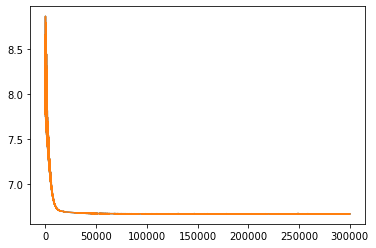

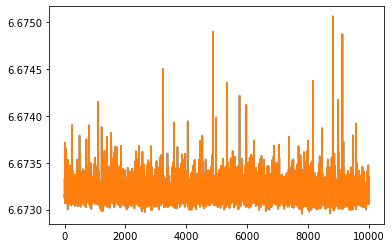

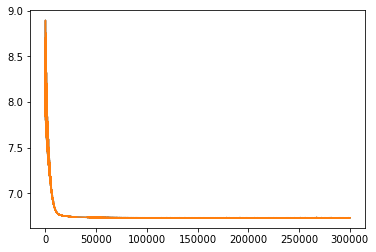

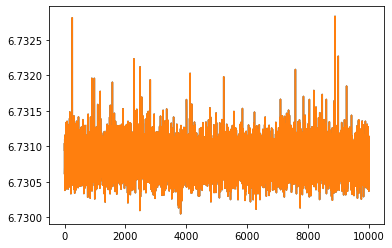

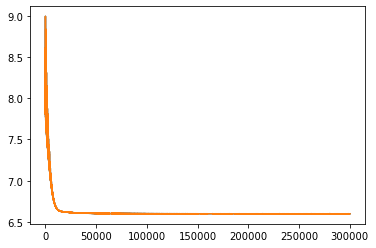

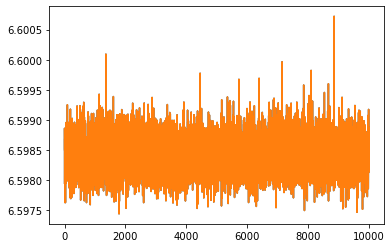

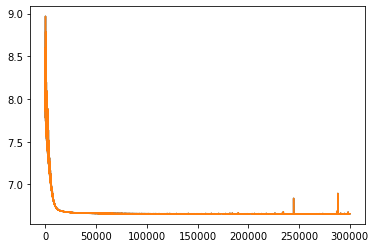

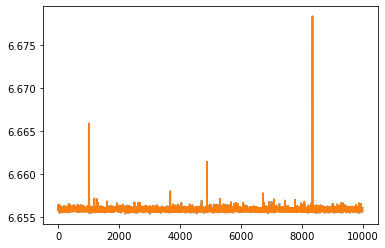

In [12]:
models[0].plot_history()
plt.show()
models[0].plot_history(290000)
plt.show()
models[1].plot_history()
plt.show()
models[1].plot_history(290000)
plt.show()
models[2].plot_history()
plt.show()
models[2].plot_history(290000)
plt.show()
models[3].plot_history()
plt.show()
models[3].plot_history(290000)

Check what X_corrected_V2 looks like for all slides:

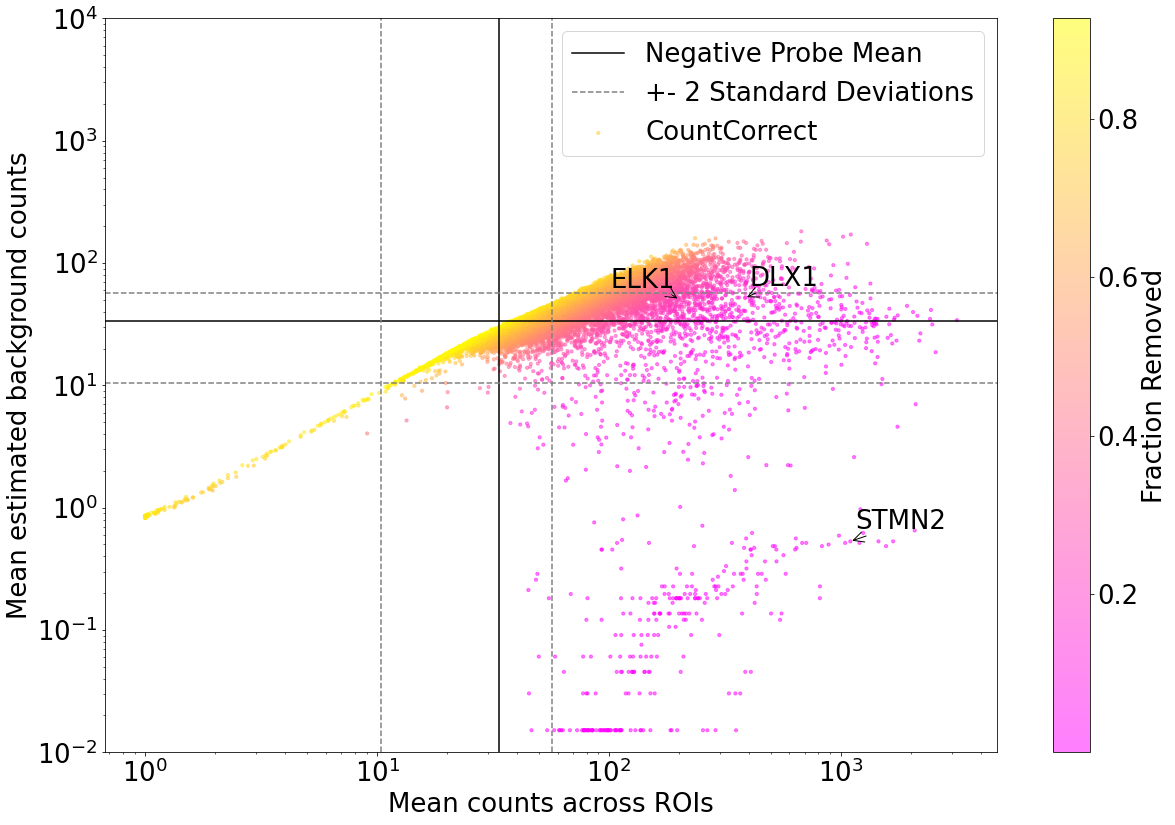

In [13]:
genesOfInterest = np.array(('DLX1', 'STMN2', 'ELK1'))
ProbeCounts_GeneralModel_V2.plot_X_corrected_overview5(models[0], genesOfInterest, cmap = 'spring')

In [14]:
import imp
import isctools
from isctools import pymc3_model
imp.reload(isctools.pymc3_model)
imp.reload(isctools.ProbeCounts__GeneralModel_V2_SmoothedOverdispersion)
from isctools.ProbeCounts__GeneralModel_V2_SmoothedOverdispersion import ProbeCounts_GeneralModel_V2

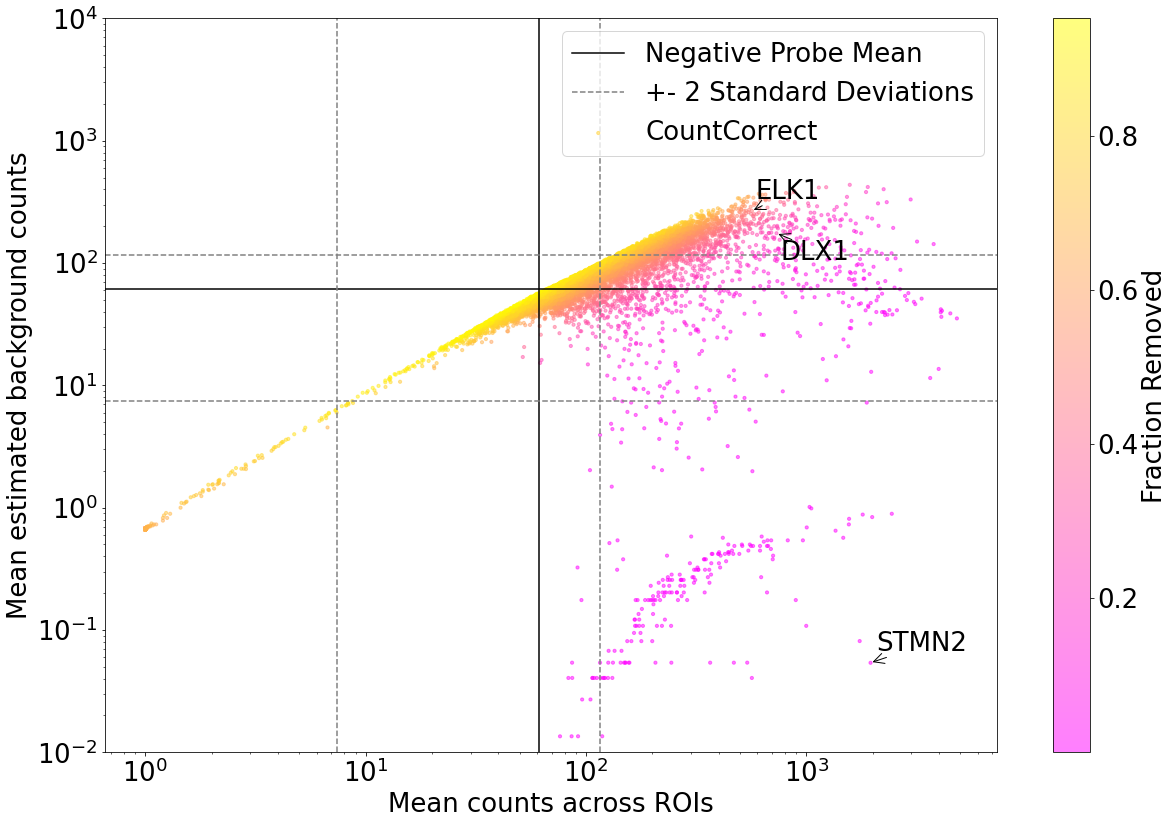

In [15]:
genesOfInterest = np.array(('DLX1', 'STMN2', 'ELK1'))
ProbeCounts_GeneralModel_V2.plot_X_corrected_overview5(models[1], genesOfInterest,
                                                       cmap = 'spring',
                                                       saveFig='/nfs/team283/aa16/KR_NAS/0_publication_figures/Figure1J_CC-V2_overview.pdf',
                                                       correction = 1)

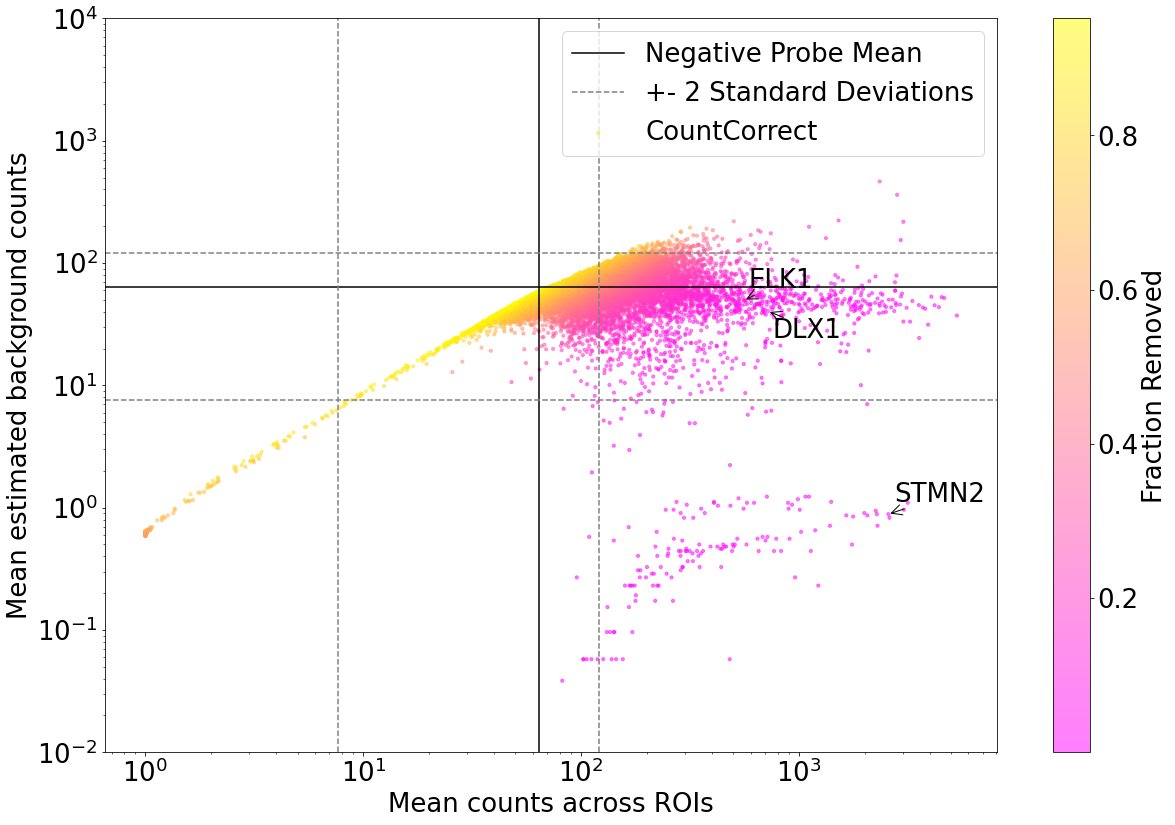

In [16]:
genesOfInterest = np.array(('DLX1', 'STMN2', 'ELK1'))
ProbeCounts_GeneralModel_V2.plot_X_corrected_overview5(models[2], genesOfInterest, cmap = 'spring')

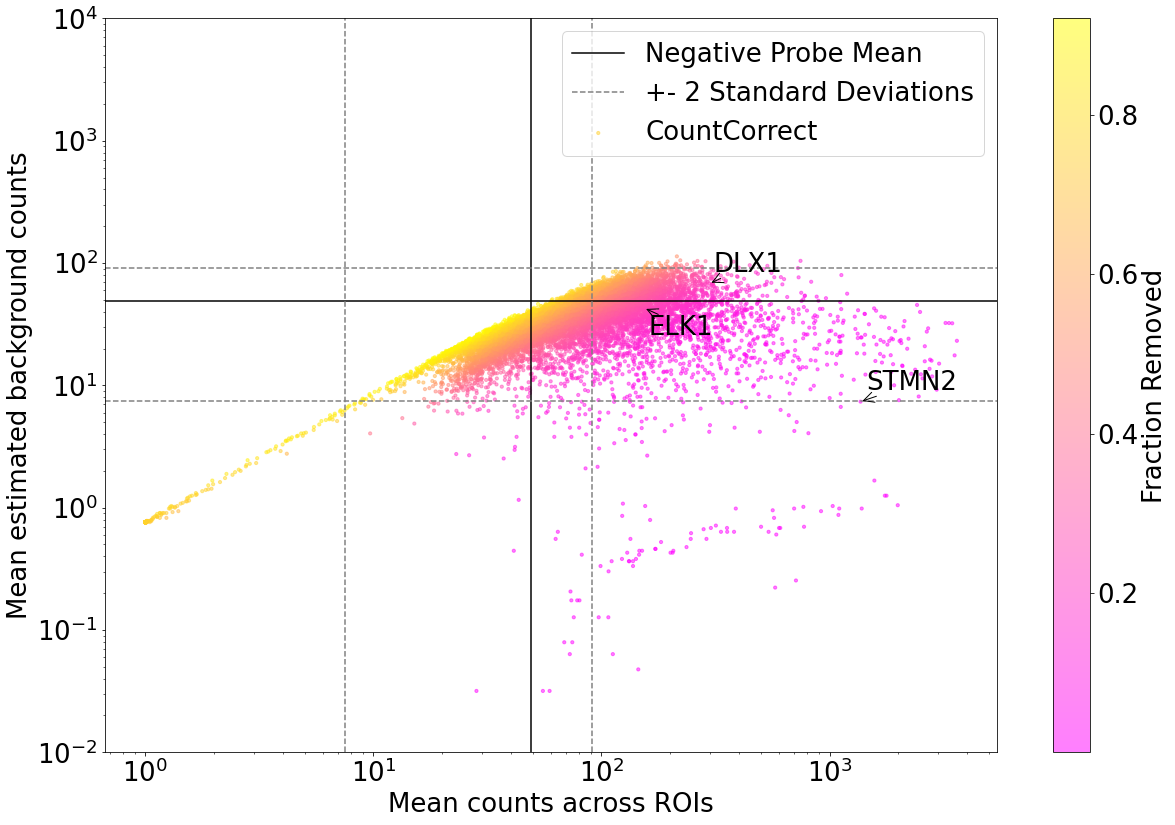

In [17]:
genesOfInterest = np.array(('DLX1', 'STMN2', 'ELK1'))
ProbeCounts_GeneralModel_V2.plot_X_corrected_overview5(models[3], genesOfInterest, cmap = 'spring')

Example genes:

Do the remaining plots only for one slide:

In [18]:
mod1 = models[1]
adata_wta = adata_slide[1]

In [19]:
# example_genes = np.array(('DLX1', 'STMN2', 'ELK1', 'EOMES', 'NEUROD6',
#                           'CRYAB', 'HES1', 'HOPX', 'SOX5', 'TBR1', 'SATB2',
#                           'CALB2', 'SST', 'DLX2', 'DLX1', 'PAX6',
#                           'SOX2', 'VIM', 'EOMES', 'NEUROD6', 'BCL11B',
#                           'SATB2', 'CALB2', 'SST', 'DLX2', 'DLX1', 'OLIG2',
#                           'OLIG1', 'CLDN5', 'ITM2A', 'RGS5', 'CX3CR1', 'AIF1',
#                            'RGS5', 'AIF1', 'PP1R17', 'GABRB3', 'SYT4', 'OLIG2'))
# x = np.asarray(adata_slide[1].obs['VCDepth'])
# order = np.where([adata_slide[1].obs['Radial_position'][i] == 2 for i in range(len(adata_slide[j].obs['Radial_position']))])[0]
# ProbeCounts_GeneralModel_V2.plot_X_corrected_exampleGenes1(mod1, x, order, example_genes, saveFig = '/nfs/team283/aa16/KR_NAS/0_publication_figures/SuppFig_ExampleGeneCorrections_CC-V2')

Find example genes that are highly corrected in wta data and lowly expressed in scRNAseq data:

In [20]:
rankedGenes = ProbeCounts_GeneralModel_V2.rank_X_corrected_genes(mod1)

In [21]:
rankedGenes

Gene  Total Counts  Removed Counts  \
HEATR3      HEATR3          2902            2763   
C12orf42  C12orf42          3202            3035   
ERRFI1      ERRFI1          3713            3515   
EIPR1        EIPR1          3485            3297   
COPS7B      COPS7B          3030            2865   
...            ...           ...             ...   
STMN2        STMN2        144820               4   
DMTN          DMTN          5096               0   
MET            MET          5631               0   
KCNV1        KCNV1          6610               0   
KIAA0319  KIAA0319          4390               0   

          Fraction Removed Counts (Mean)  Fraction Removed Counts (q05)  \
HEATR3                          0.952102                       0.935906   
C12orf42                        0.947845                       0.933167   
ERRFI1                          0.946674                       0.931053   
EIPR1                           0.946055                       0.930560   
COPS7B                          0.945545                       0.930693   
...                                  ...                            ...   
STMN2                           0.000028                       0.000000   
DMTN                            0.000000                       0.000000   
MET                             0.000000                       0.000000   
KCNV1                           0.000000                       0.000000   
KIAA0319                        0.000000                       0.000000   

          Fraction Removed Counts (q95)  Mean Counts  
HEATR3                         0.964852           39  
C12orf42                       0.962523           43  
ERRFI1                         0.957447           50  
EIPR1                          0.959254           47  
COPS7B                         0.957756           40  
...                                 ...          ...  
STMN2                          0.000131         1957  
DMTN                           0.000589           68  
MET                            0.000178           76  
KCNV1                          0.000454           89  
KIAA0319                       0.000228           59  

[18279 rows x 7 columns]

In [22]:
# Restrict to genes with more than 100 mean counts and more than 80% of counts removed:
lookup_genes = np.array(rankedGenes.loc[[rankedGenes['Mean Counts'].iloc[i] > 300 and
                                          rankedGenes['Fraction Removed Counts (Mean)'].iloc[i] > 0.5
                                          for i in range(len(rankedGenes['Fraction Removed Counts (Mean)']))],:]['Gene'])

In [23]:
# And choose the lowest expressed ones in scRNAseq:
meanExpression_sc = pd.read_csv(path + "data/polioudakis2019_meanExpressionProfiles.csv", index_col=0)
lookup_genes = np.array([e for e in lookup_genes if e in meanExpression_sc.index])
lookup_genes = lookup_genes[np.argsort(np.mean(meanExpression_sc.loc[lookup_genes,:], axis = 1))]

<AxesSubplot:>

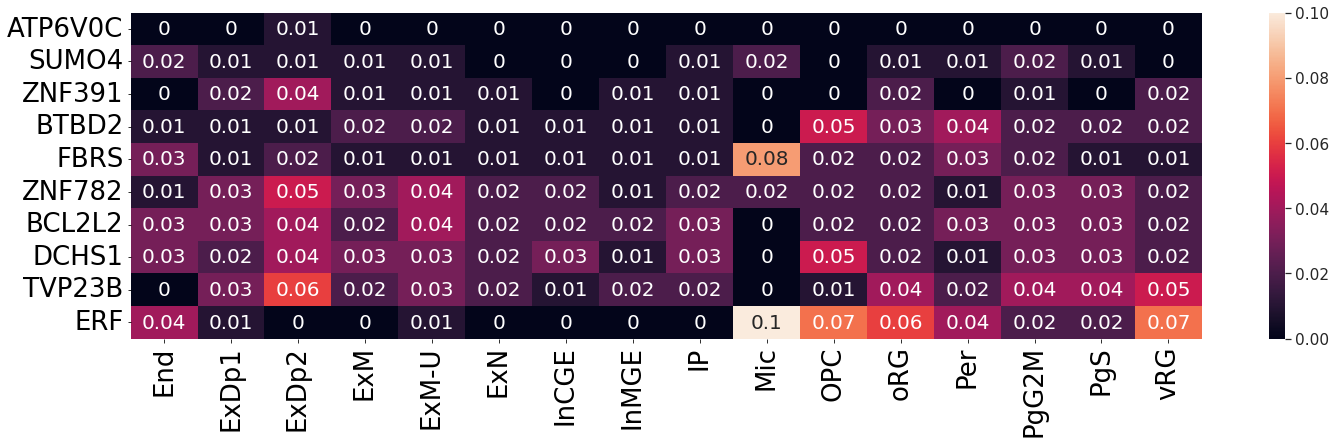

In [24]:
# And plot their expression in scRNAseq:
fig, ax = plt.subplots(figsize=(24,6))
sns.set(font_scale=1.4)
sns.heatmap(np.round(meanExpression_sc.loc[lookup_genes[0:10],:],2), annot = True,  annot_kws={"size": 20})

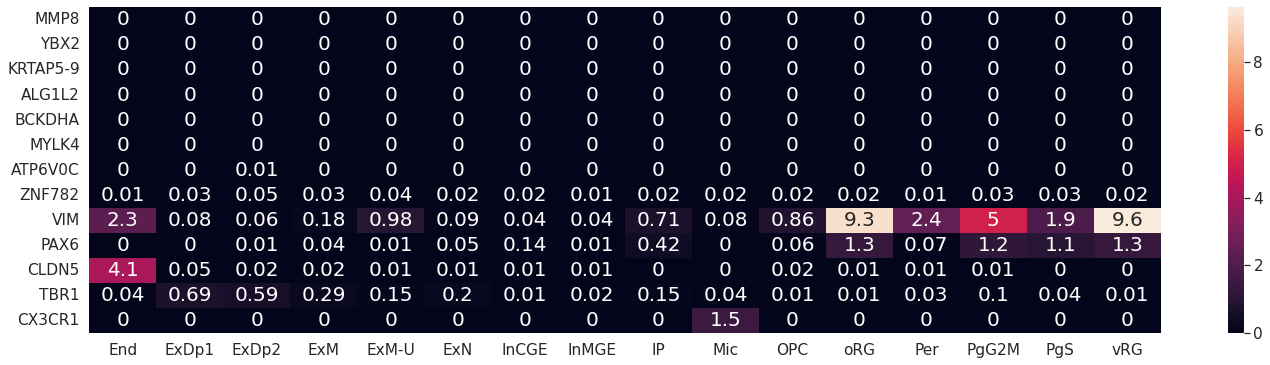

In [25]:
# Plot only those with 0 counts:
example_genes = np.array(('MMP8', 'YBX2', 'KRTAP5-9', 'ALG1L2', 'BCKDHA', 'MYLK4',
                          'ATP6V0C', 'ZNF782',
                          'VIM', 'PAX6', 'CLDN5', 'TBR1', 'CX3CR1'))
# example_genes = lookup_genes[0:5]
fig, ax = plt.subplots(figsize=(24,6))
sns.set(font_scale=1.4)
sns.heatmap(np.round(meanExpression_sc.loc[example_genes,:],2), annot = True,  annot_kws={"size": 20})
plt.savefig('/nfs/team283/aa16/KR_NAS/0_publication_figures/SuppFig_ExampleGenes_Heatmap.pdf')

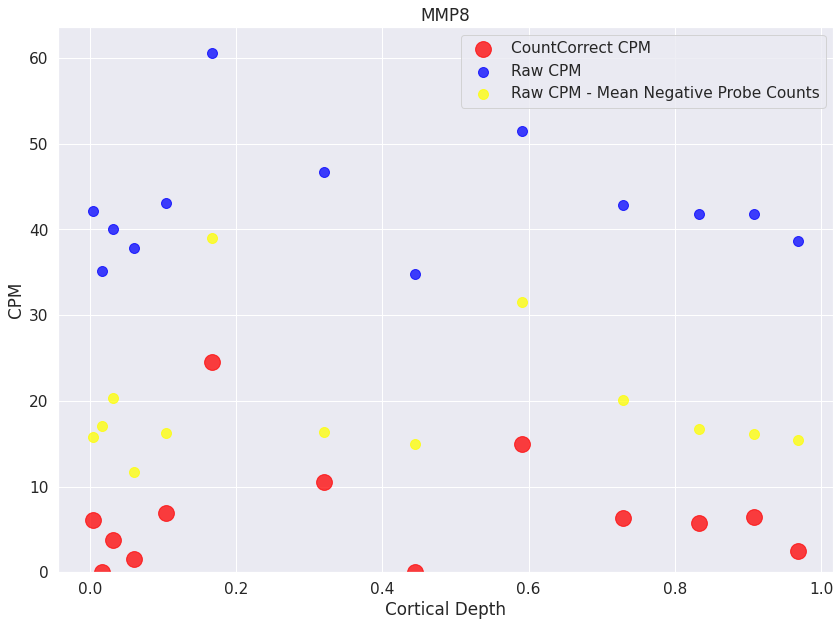

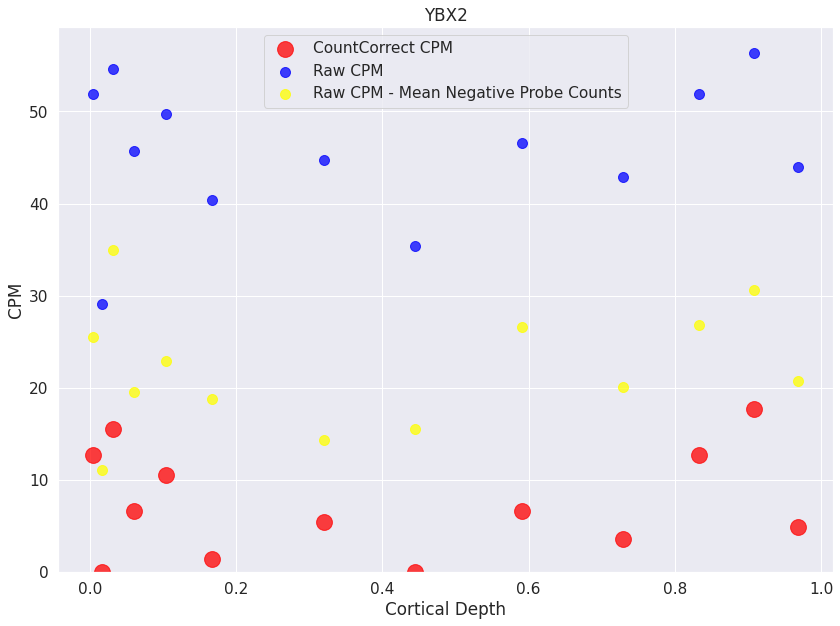

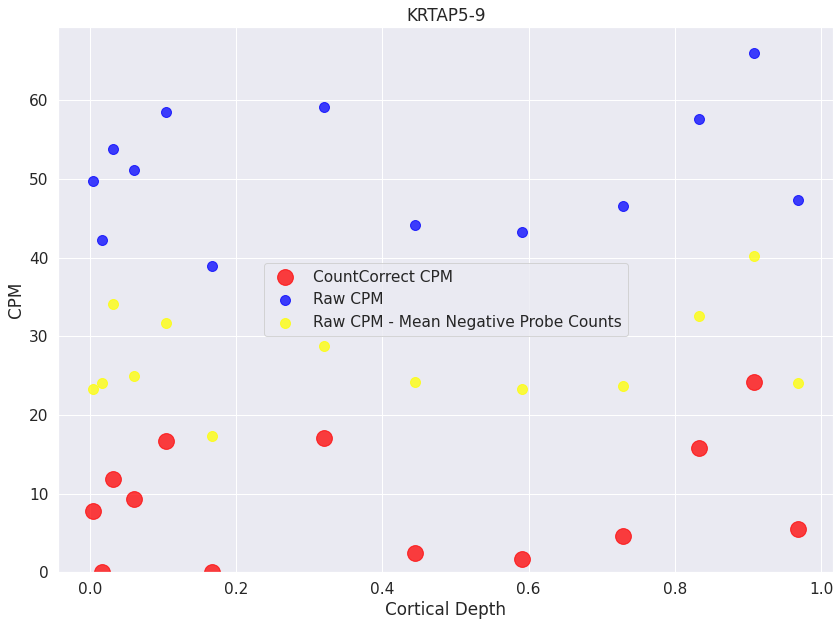

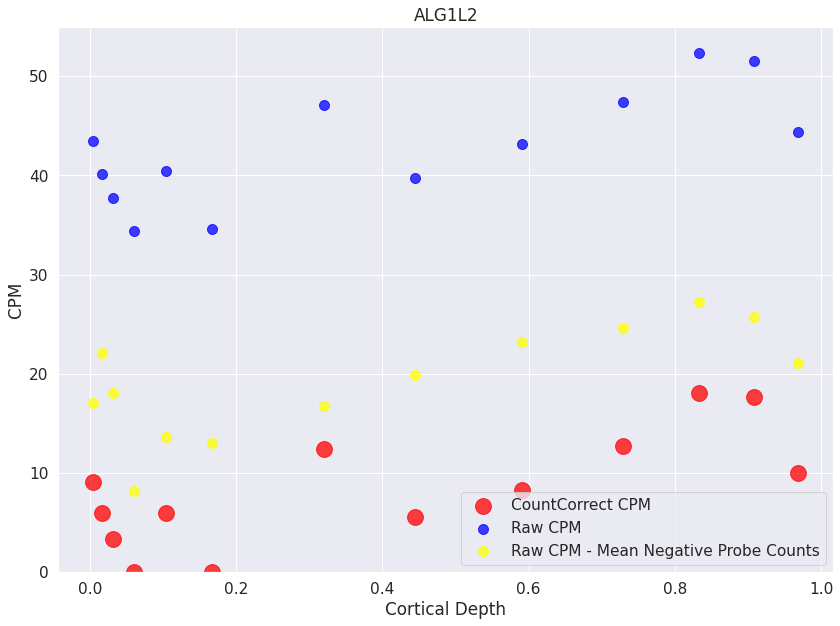

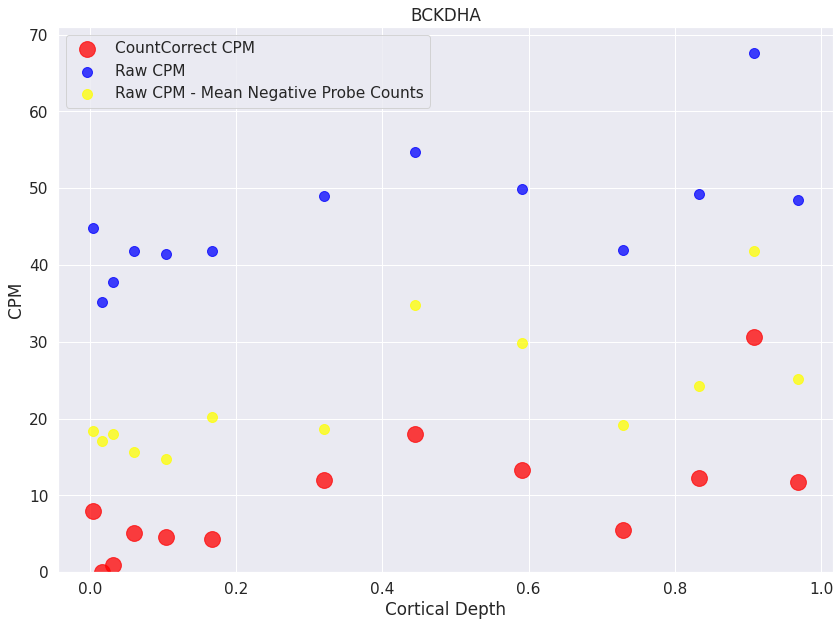

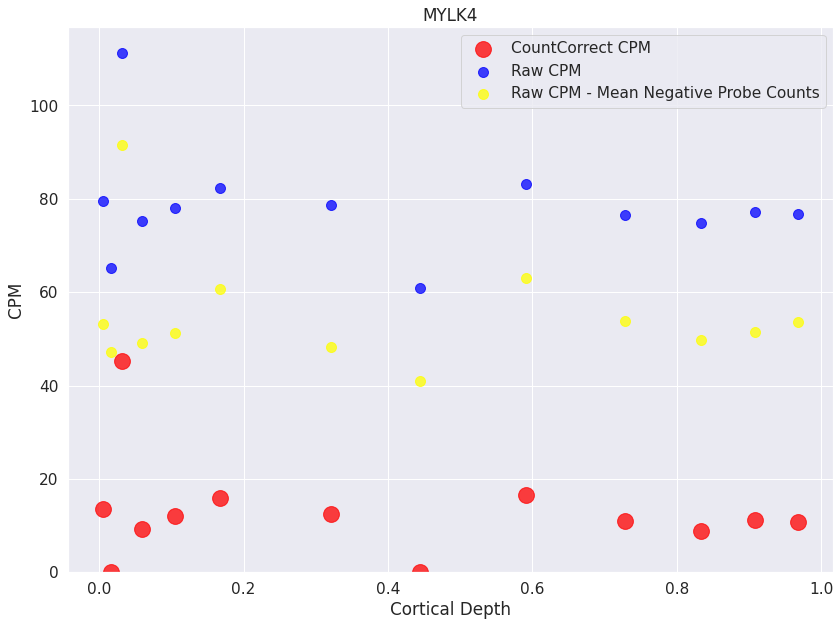

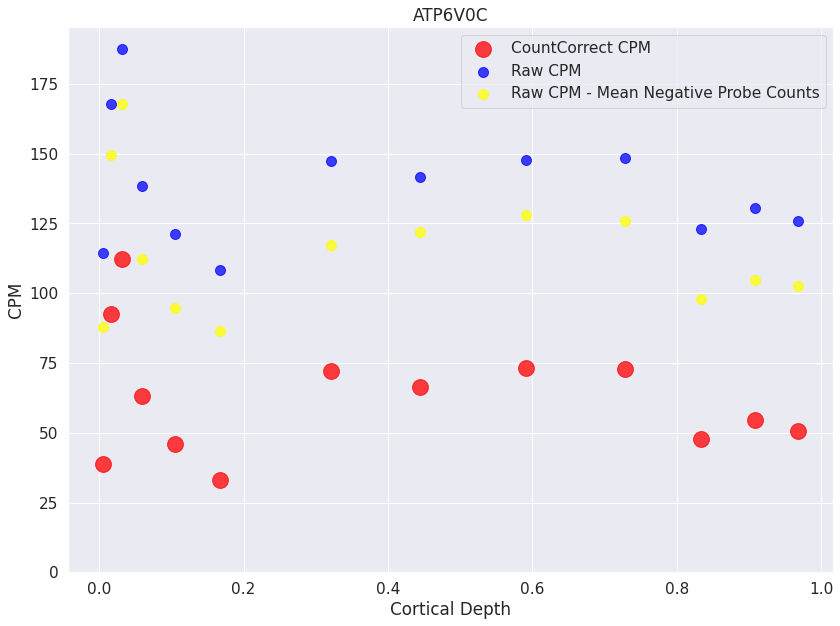

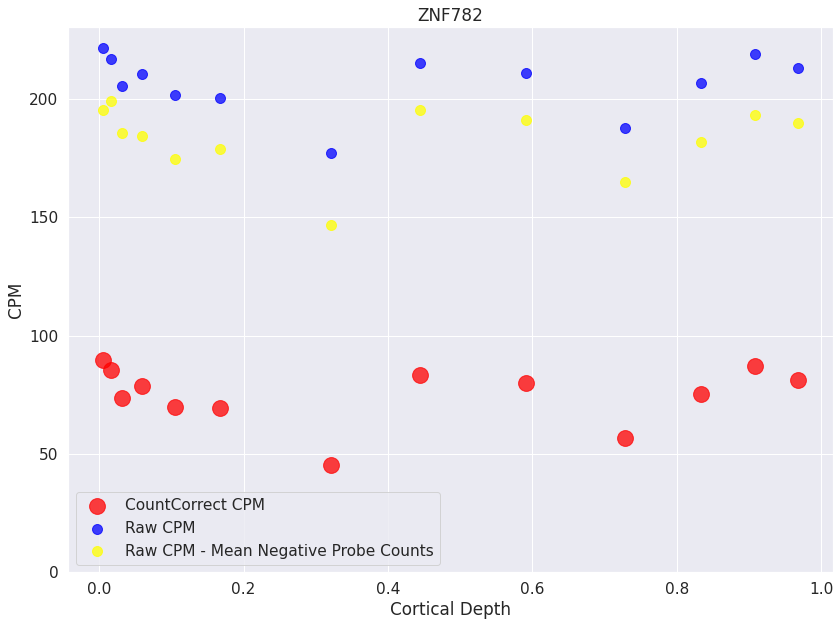

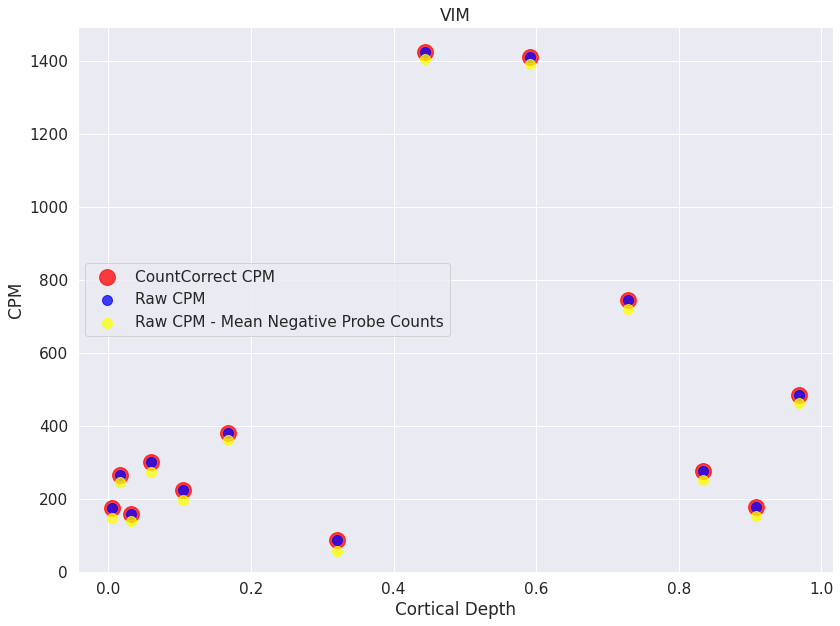

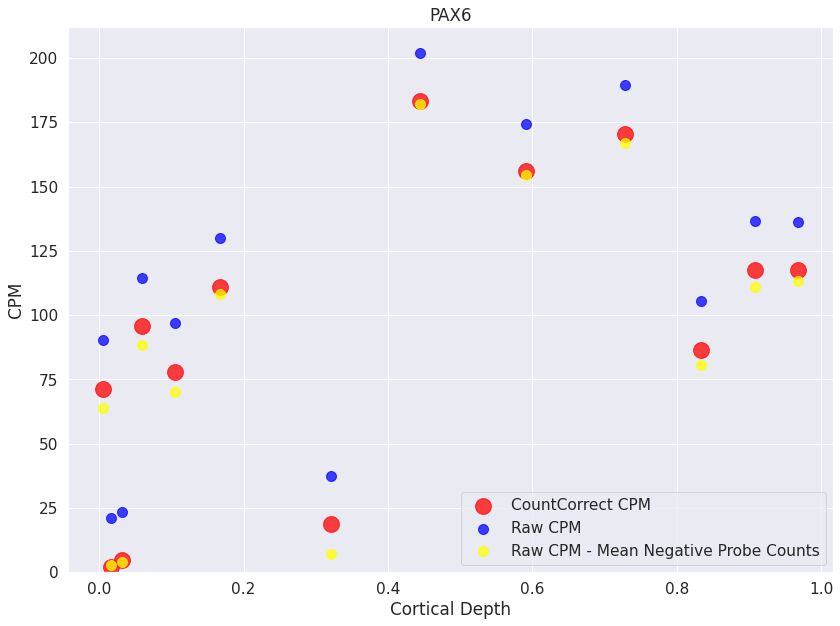

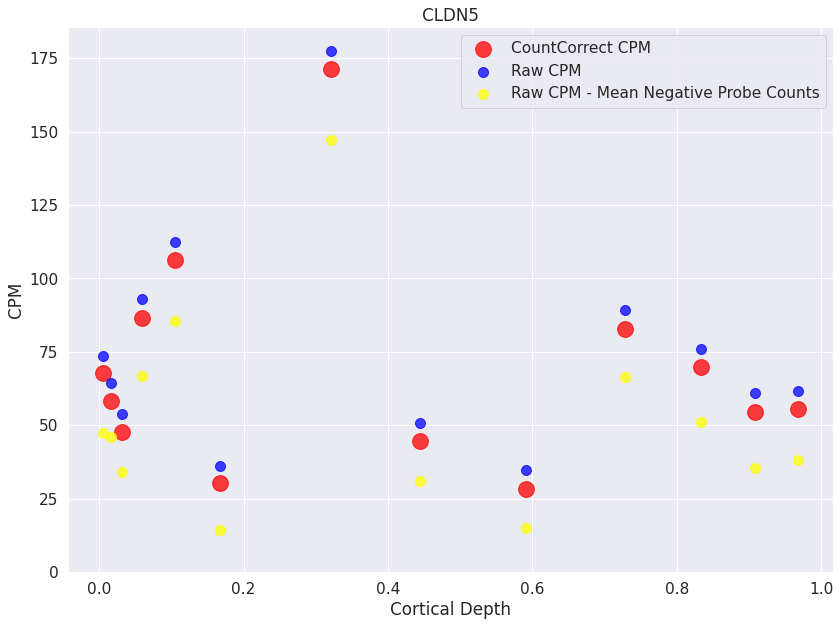

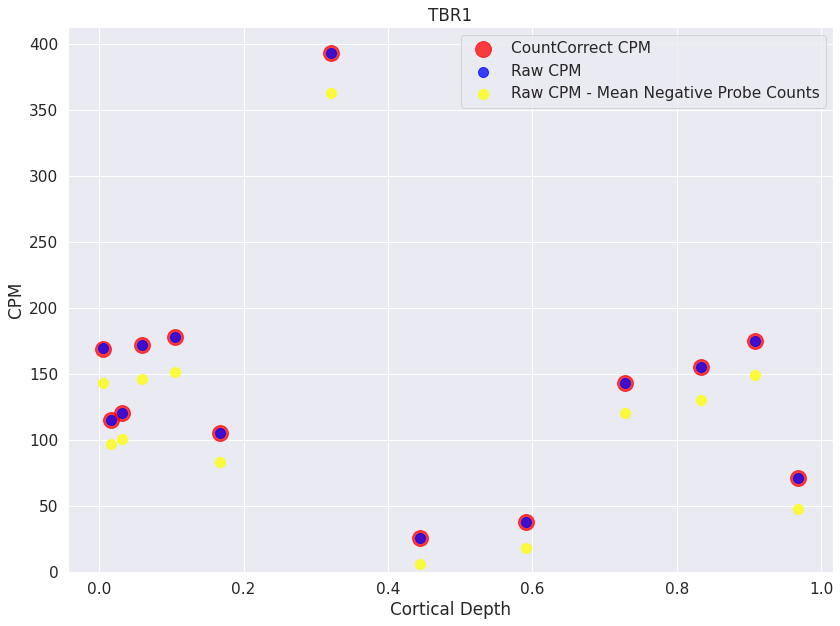

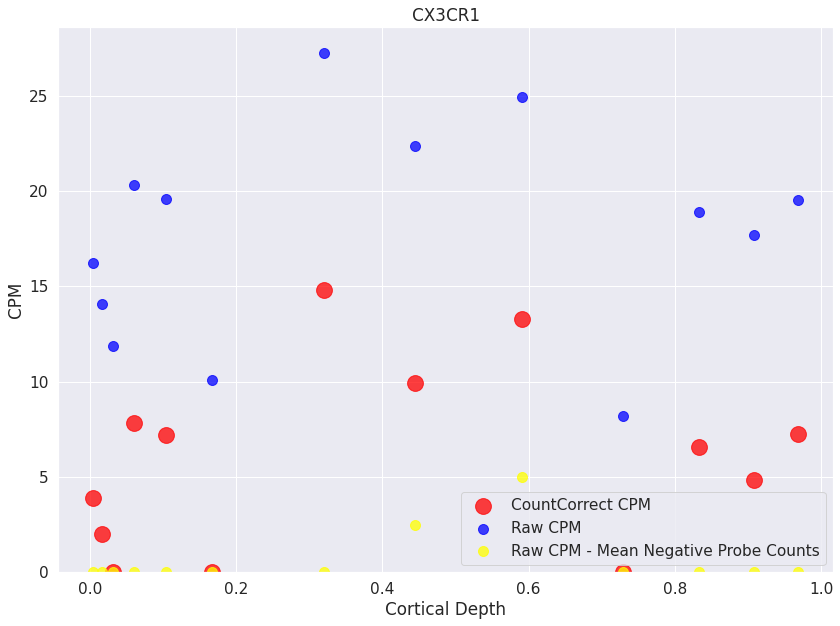

In [26]:
x = np.asarray(adata_slide[j].obs['VCDepth'])
order = np.where([adata_slide[j].obs['Radial_position'][i] == 2 for i in range(len(adata_slide[j].obs['Radial_position']))])[0]
ProbeCounts_GeneralModel_V2.plot_X_corrected_exampleGenes1(mod1, x, order, example_genes, saveFig = '/nfs/team283/aa16/KR_NAS/0_publication_figures/SuppFig_ExampleGeneCorrections_0counts.pdf')

Find genes that are lowly corrected genes and highly expressed in scRNAseq data:

In [27]:
lookup_genes = np.array(rankedGenes.loc[rankedGenes['Fraction Removed Counts (Mean)'] < 0.01]['Gene'])

<AxesSubplot:>

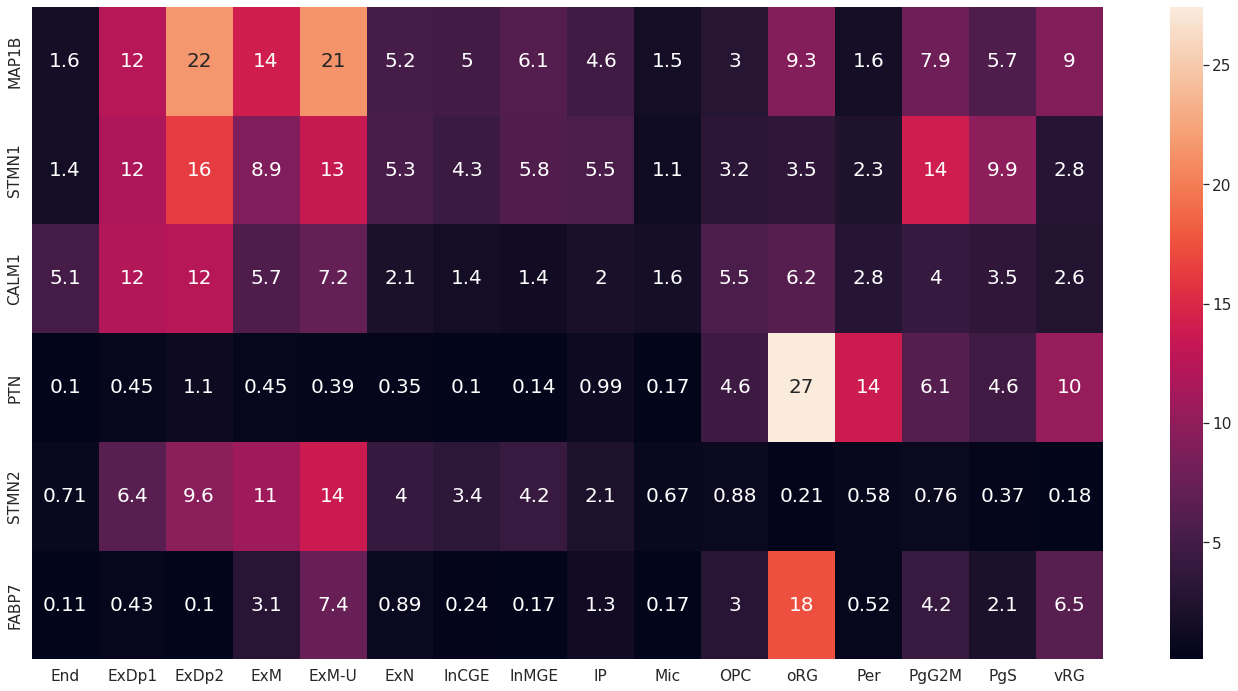

In [28]:
lookup_genes = np.array([e for e in lookup_genes if e in meanExpression_sc.index])
lookup_genes = lookup_genes[np.argsort(-np.mean(meanExpression_sc.loc[lookup_genes,:], axis = 1))]
example_genes = lookup_genes[0:6]
fig, ax = plt.subplots(figsize=(24,12))
sns.set(font_scale=1.4)
sns.heatmap(np.round(meanExpression_sc.loc[example_genes,:],2), annot = True,  annot_kws={"size": 20})

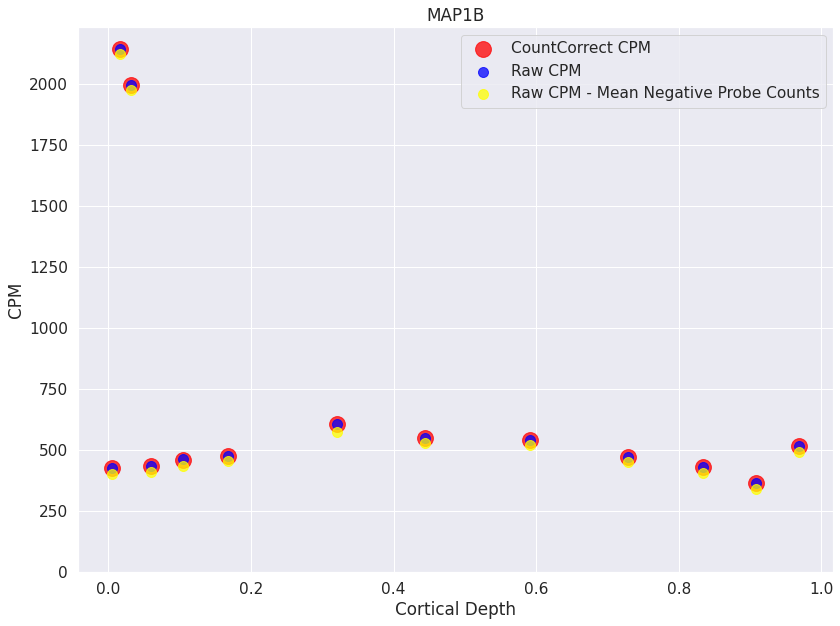

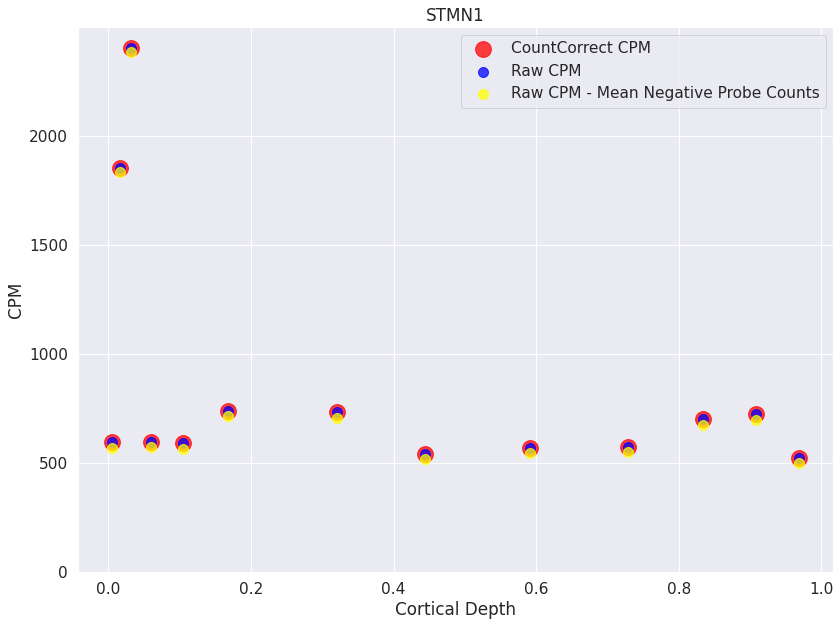

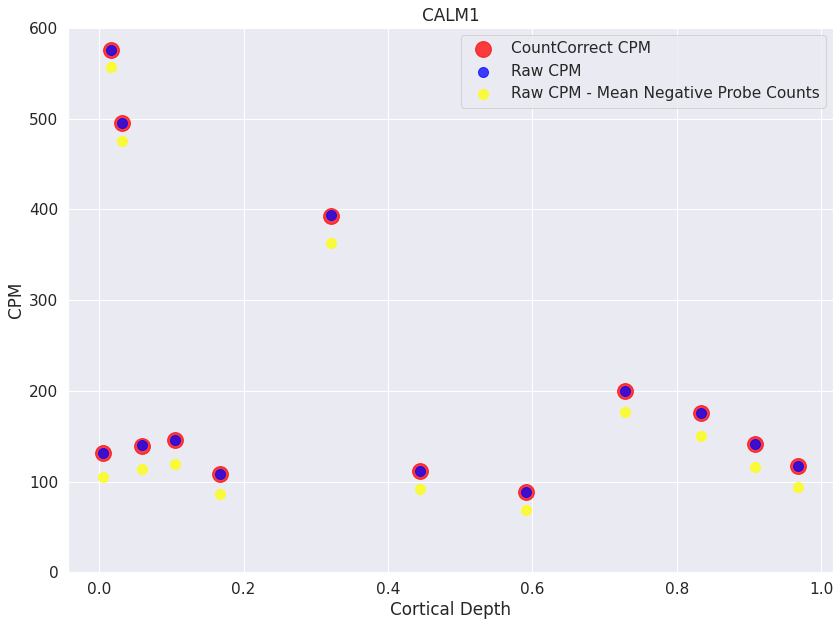

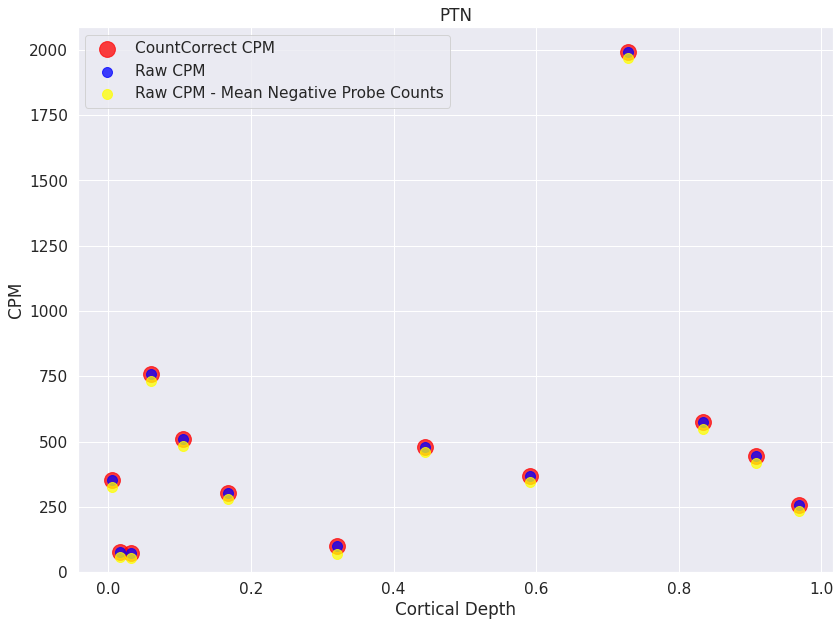

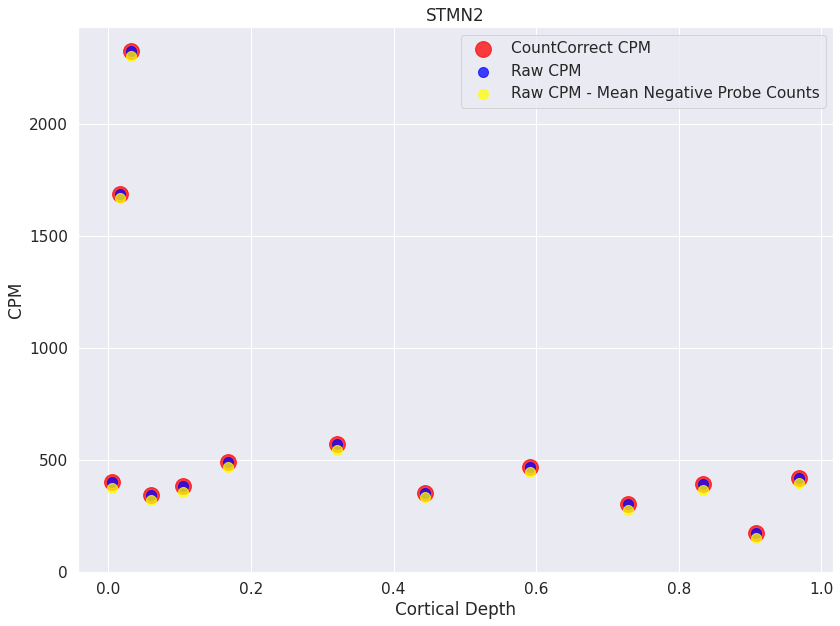

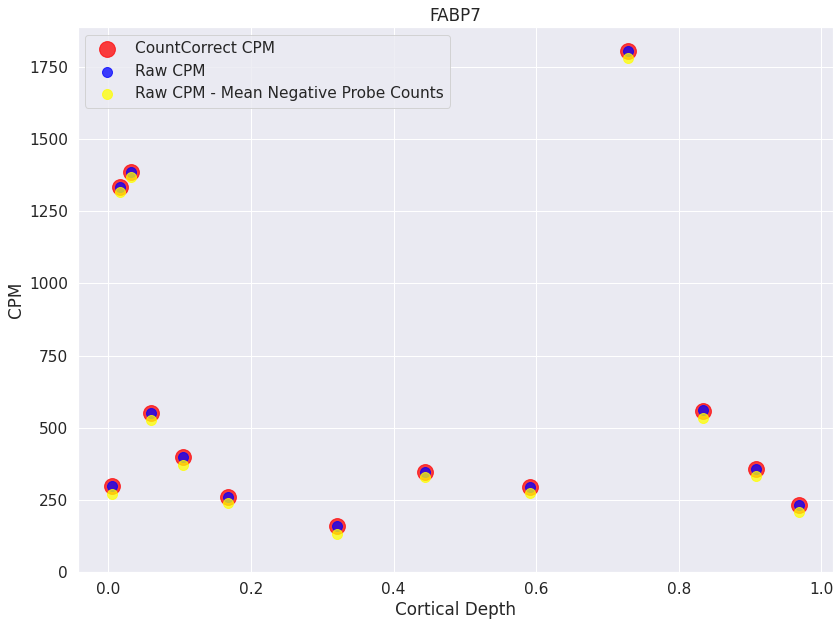

In [29]:
x = np.asarray(adata_slide[j].obs['VCDepth'])
order = np.where([adata_slide[j].obs['Radial_position'][i] == 2 for i in range(len(adata_slide[j].obs['Radial_position']))])[0]
ProbeCounts_GeneralModel_V2.plot_X_corrected_exampleGenes1(mod1, x, order, example_genes, saveFig = '/nfs/team283/aa16/KR_NAS/0_publication_figures/SuppFig_ExampleGeneCorrections_Highcounts.pdf')

In [30]:
# Get our HOPXpos and EOMESpos AOIs:
order_HOPX = np.where([adata_wta.obs['AOI_type'][i] == 'HOPXpos' for i in range(len(adata_wta.obs['Radial_position']))])[0]
order_EOMES = np.where([adata_wta.obs['AOI_type'][i] == 'EOMESpos' for i in range(len(adata_wta.obs['Radial_position']))])[0]
order = np.concatenate([order_HOPX, order_EOMES])

# Get cpm for both corrected (isc_cpm) and uncorrected data (cpm) and naive model:
total_counts = np.sum(mod1.X_data, axis = 1)
cpm = mod1.X_data/total_counts.reshape(np.shape(mod1.X_data)[0],1)*10**6
isc_cpm = mod1.X_corrected_mean/total_counts.reshape(np.shape(mod1.X_data)[0],1)*10**6

total_counts_naive = np.sum(mod1.X_naive, axis = 1)
cpm_naive = mod1.X_naive/total_counts_naive.reshape(np.shape(mod1.X_naive)[0],1)*10**6

# Put data into two AnnData objects:
adata_cpm = adata = sc.AnnData(X=cpm[order],
                               obs=pd.DataFrame(data = np.concatenate([np.repeat('HOPXpos', len(order_HOPX)),
                                                                      np.repeat('EOMESpos', len(order_EOMES))]),
                                                columns = ['Cell Type']))

adata_isc_cpm = adata = sc.AnnData(X=isc_cpm[order],
                               obs=pd.DataFrame(data = np.concatenate([np.repeat('HOPXpos', len(order_HOPX)),
                                                                      np.repeat('EOMESpos', len(order_EOMES))]),
                                                columns = ['Cell Type']))

adata_naive_cpm = adata = sc.AnnData(X=cpm_naive[order],
                               obs=pd.DataFrame(data = np.concatenate([np.repeat('HOPXpos', len(order_HOPX)),
                                                                      np.repeat('EOMESpos', len(order_EOMES))]),
                                                columns = ['Cell Type']))

# Perform differential expression with diffxpy for both cases:

test_rank_cpm = de.test.rank_test(
    data=adata_cpm,
    grouping="Cell Type",
    gene_names = mod1.var_names,
    ).summary()

test_rank_isc_cpm = de.test.rank_test(
    data=adata_isc_cpm,
    grouping="Cell Type",
    gene_names = mod1.var_names,
    ).summary()

test_rank_naive_cpm = de.test.rank_test(
    data=adata_naive_cpm,
    grouping="Cell Type",
    gene_names = mod1.var_names,
    ).summary()

/nfs/team283/aa16/software/miniconda3/envs/countcorrect/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.


In [32]:
threshold = 1
ProbeCounts_GeneralModel_V2.compute_logFC(mod1, groupA = order_HOPX, groupB = order_EOMES, correction=2)
mod1.compute_FDR(logFC_threshold = threshold)

In [33]:
import statsmodels.stats.multitest as mult
test_rank_cpm['fdr'] = mult.multipletests(test_rank_cpm['pval'], method = 'fdr_bh')[1]
test_rank_isc_cpm['fdr'] = mult.multipletests(test_rank_isc_cpm['pval'], method = 'fdr_bh')[1]
test_rank_naive_cpm['fdr'] = mult.multipletests(test_rank_naive_cpm['pval'], method = 'fdr_bh')[1]

In [34]:
cpm_genes = np.asarray(test_rank_cpm['gene'].loc[[test_rank_cpm['qval'][i] < 0.05 and abs(test_rank_cpm['log2fc'][i]) > threshold for i in range(len(test_rank_cpm['fdr']))]])
isc_cpm_genes = np.asarray(test_rank_isc_cpm['gene'].loc[[test_rank_isc_cpm['qval'][i] < 0.05 and abs(test_rank_isc_cpm['log2fc'][i]) > threshold for i in range(len(test_rank_cpm['fdr']))]])
naive_cpm_genes = np.asarray(test_rank_naive_cpm['gene'].loc[[test_rank_naive_cpm['qval'][i] < 0.05 and abs(test_rank_naive_cpm['log2fc'][i]) > threshold for i in range(len(test_rank_naive_cpm['fdr']))]])

print(len(cpm_genes))
print(len(isc_cpm_genes))
print(len(naive_cpm_genes))

175
542
414


In [35]:
sc_de_results = pickle.load(open(path + 'data/oRG_IP_Polioudakis2019_DE_cpm_results.p', "rb"))

In [36]:
group1_cpm = np.asarray(test_rank_cpm['gene'].loc[[test_rank_cpm['qval'][i] < 0.05 and test_rank_cpm['log2fc'][i] > threshold for i in range(len(test_rank_cpm['qval']))]])
group2_cpm = np.asarray(test_rank_cpm['gene'].loc[[test_rank_cpm['qval'][i] < 0.05 and test_rank_cpm['log2fc'][i] < -threshold for i in range(len(test_rank_cpm['qval']))]])
negatives_cpm = np.asarray(test_rank_cpm['gene'].loc[[test_rank_cpm['gene'][i] not in group1_cpm and test_rank_cpm['gene'][i] not in group2_cpm for i in range(len(test_rank_cpm['gene']))]])
                                    
group1_isc_cpm = np.asarray(test_rank_isc_cpm['gene'].loc[[test_rank_isc_cpm['qval'][i] < 0.05 and test_rank_isc_cpm['log2fc'][i] > threshold for i in range(len(test_rank_isc_cpm['qval']))]])
group2_isc_cpm = np.asarray(test_rank_isc_cpm['gene'].loc[[test_rank_isc_cpm['qval'][i] < 0.05 and test_rank_isc_cpm['log2fc'][i] < -threshold for i in range(len(test_rank_isc_cpm['qval']))]])
negatives_isc_cpm = np.asarray(test_rank_isc_cpm['gene'].loc[[test_rank_isc_cpm['gene'][i] not in group1_cpm and test_rank_isc_cpm['gene'][i] not in group2_cpm for i in range(len(test_rank_isc_cpm['gene']))]])

group1_naive_cpm = np.asarray(test_rank_naive_cpm['gene'].loc[[test_rank_naive_cpm['qval'][i] < 0.05 and test_rank_naive_cpm['log2fc'][i] > threshold for i in range(len(test_rank_naive_cpm['qval']))]])
group2_naive_cpm = np.asarray(test_rank_naive_cpm['gene'].loc[[test_rank_naive_cpm['qval'][i] < 0.05 and test_rank_naive_cpm['log2fc'][i] < -threshold for i in range(len(test_rank_naive_cpm['qval']))]])
negatives_naive_cpm = np.asarray(test_rank_naive_cpm['gene'].loc[[test_rank_naive_cpm['gene'][i] not in group1_cpm and test_rank_naive_cpm['gene'][i] not in group2_cpm for i in range(len(test_rank_naive_cpm['gene']))]])

group1_reference = np.asarray(sc_de_results['gene'].loc[[sc_de_results['qval'][i] < 0.05 and sc_de_results['log2fc'][i] > threshold for i in range(len(sc_de_results['log2fc']))]])
group2_reference = np.asarray(sc_de_results['gene'].loc[[sc_de_results['qval'][i] < 0.05 and sc_de_results['log2fc'][i] < -threshold for i in range(len(sc_de_results['log2fc']))]])
negatives_reference = np.asarray(sc_de_results['gene'].loc[[sc_de_results['gene'][i] not in group1_reference and sc_de_results['gene'][i] not in group2_reference for i in range(len(sc_de_results['gene']))]])


In [37]:
def evaluatePerformance(group1, group2, negatives, group1_reference, group2_reference, negatives_reference):
    
    # Reduce to common genes:
    test_genes = np.concatenate([group1, group2, negatives])
    reference_genes = np.concatenate([group1_reference, group2_reference, negatives_reference])
    common_genes = reference_genes[[reference_genes[i] in test_genes for i in range(len(reference_genes))]]
    
    group1 = group1[[group1[i] in common_genes for i in range(len(group1))]]
    group2 = group2[[group2[i] in common_genes for i in range(len(group2))]]
    negatives = negatives[[negatives[i] in common_genes for i in range(len(negatives))]]
    
    group1_reference = group1_reference[[group1_reference[i] in common_genes for i in range(len(group1_reference))]]
    group2_reference = group2_reference[[group2_reference[i] in common_genes for i in range(len(group2_reference))]]
    negatives_reference = negatives_reference[[negatives_reference[i] in common_genes for i in range(len(negatives_reference))]]
    
    print(len(group1_reference) + len(group2_reference))
    
    # Calculate recall, precision and f-score:
    recall = (sum([group1[i] in group1_reference for i in range(len(group1))]) +
    sum([group2[i] in group2_reference for i in range(len(group2))]))/(len(group1_reference) + len(group2_reference)) 
                                                                       
    precision = (sum([group1[i] in group1_reference for i in range(len(group1))])+
                 sum([group2[i] in group2_reference for i in range(len(group2))]))/(len(group1) + len(group2))   
                                                                       
    fscore = 2*(precision*recall)/(precision+recall)
    
    return np.array((fscore, precision, recall))

In [38]:
evaluatePerformance(group1_cpm, group2_cpm, negatives_cpm, group1_reference, group2_reference, negatives_reference)

2882


array([0.08045213, 0.96031746, 0.04198473])

In [39]:
evaluatePerformance(group1_isc_cpm, group2_isc_cpm, negatives_isc_cpm, group1_reference, group2_reference, negatives_reference)

2882


array([0.20532775, 0.74727669, 0.11901457])

In [40]:
evaluatePerformance(group1_naive_cpm, group2_naive_cpm, negatives_naive_cpm, group1_reference, group2_reference, negatives_reference)

2880


array([0.18385093, 0.87058824, 0.10277778])

In [41]:
sum([group1_isc_cpm[i] in group1_reference for i in range(len(group1_isc_cpm))]) + sum([group2_isc_cpm[i] in group2_reference for i in range(len(group2_isc_cpm))])

343

In [42]:
sum([group1_naive_cpm[i] in group1_reference for i in range(len(group1_naive_cpm))]) + sum([group2_naive_cpm[i] in group2_reference for i in range(len(group2_naive_cpm))])

296

In [43]:
from adjustText import adjust_text

def plot_volcano_with_reference(log2fc, fdr, pval, genes, total, group1_reference, group2_reference,
                                genesOfInterest = None, n_max_genes = 1, alpha = 0.25, FDR_cutoff = 0.05,
                                height = 10, width = 10, posterios_samples = 1000, saveFig = None):
    r""" Make a volcano plot of the differential expression analysis.
    :genesOfInterest: numpy array of genes to annotate in the plot
    :n_max_genes: number of genes to automatically annotate at the extreme ends of the plot,
    i.e. the most differentially expressed genes
    :alpha: transparency of dots 
    :FDR_cutoff: what false discovery rate to use
    :height: height of figure
    :width: width of figure
    """
    
    fdr = fdr[np.abs(log2fc) < 1000]
    pval = pval[np.abs(log2fc) < 1000]
    genes = genes[np.abs(log2fc) < 1000]
    log2fc = log2fc[np.abs(log2fc) < 1000]
    
    subset2 = [g in group1_reference for g in genes]
    subset3 = [g in group2_reference for g in genes]
    
    # Set figure parameters:
    SMALL_SIZE = 20
    MEDIUM_SIZE = 20
    BIGGER_SIZE = 20
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title    
    
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 1
    plt.rcParams['grid.color'] = "#cccccc"
    
    fig = plt.figure(figsize=(width, height))
    ax1 = plt.subplot2grid((2,3), (0, 0), rowspan=2, colspan = 2)
    ax2 = plt.subplot2grid((2,3), (0, 2))
    ax3 = plt.subplot2grid((2,3), (1, 2))
    
    colours = np.repeat('grey', len(log2fc))
    colours[[log2fc[i] > 1 and fdr[i] < FDR_cutoff for i in range(len(log2fc))]] = 'red'
    colours[[log2fc[i] < -1 and fdr[i] < FDR_cutoff for i in range(len(log2fc))]] = 'blue'
    ax1.scatter(log2fc, -np.log10(pval), c=colours, alpha = 0.1)
    #plt.hlines(np.amin(self.logFC['probability'][self.logFC['FDR'] < FDR_cutoff]), np.amin(self.logFC['mean']),
    #           np.amax(self.logFC['mean']), linestyles = 'dashed')
    #plt.text(np.amin(self.logFC['mean']),np.amin(self.logFC['probability'][self.logFC['FDR'] < FDR_cutoff]) + 0.01,
    #         'FDR < ' + str(FDR_cutoff))
    ax1.set_xlabel('Log2FC')
#     ax1.set_ylim(0,3.5)
#    ax1.set_xlim(-3,3)
    ax1.set_ylabel('-log10(p-value)')
    ax1.set_title('CountCorrect + Wilcoxon Test \n (' + 
                  str(total) +
                 ' genes with FDR < 0.05 and log2FC > 1)')
    plt.grid(True)
    
    if n_max_genes > 0:

        maxGenes = np.array((genes[np.argmax(log2fc)],
                             genes[np.argmin(log2fc)]))
        if genesOfInterest is None:
            genesOfInterest = maxGenes
        else:
            genesOfInterest = np.concatenate((genesOfInterest, maxGenes)) 

    if genesOfInterest is not None:

        geneIndex_to_annotate = np.squeeze([np.where(genes == genesOfInterest[i])
                                            for i in range(len(genesOfInterest))])
        
        ts = []    
        for i,j in enumerate(geneIndex_to_annotate):
            ts.append(ax1.text(log2fc[j], -np.log10(pval)[j], genesOfInterest[i]))
        adjust_text(ts, arrowprops=dict(arrowstyle='->', color='black'), ax = ax1, force_points = (5,5))
    
    colours = np.repeat('green', len(log2fc))
    ax2.scatter(log2fc[subset2], -np.log10(pval[subset2]),
                c=colours[subset2], alpha = 0.1)
    #plt.hlines(np.amin(self.logFC['probability'][self.logFC['FDR'] < FDR_cutoff]), np.amin(self.logFC['mean']),
    #           np.amax(self.logFC['mean']), linestyles = 'dashed')
    #plt.text(np.amin(self.logFC['mean']),np.amin(self.logFC['probability'][self.logFC['FDR'] < FDR_cutoff]) + 0.01,
    #         'FDR < ' + str(FDR_cutoff))
    ax2.set_xlabel('Log2FC')
#     ax2.set_ylim(0,3.5)
#     ax2.set_xlim(-3,4)
    ax2.set_ylabel('-log10(p-value)')
    ax2.set_title('oRG Marker Genes \n (n =' + str(sum(subset2)) + ')')
    plt.grid(True)
    
    colours = np.repeat('green', len(log2fc))
    ax3.scatter(log2fc[subset3], -np.log10(pval[subset3]),
                c=colours[subset3], alpha = 0.1)
    #plt.hlines(np.amin(self.logFC['probability'][self.logFC['FDR'] < FDR_cutoff]), np.amin(self.logFC['mean']),
    #           np.amax(self.logFC['mean']), linestyles = 'dashed')
    #plt.text(np.amin(self.logFC['mean']),np.amin(self.logFC['probability'][self.logFC['FDR'] < FDR_cutoff]) + 0.01,
    #         'FDR < ' + str(FDR_cutoff))
    ax3.set_xlabel('Log2FC')
#     ax3.set_ylim(0,3.5)
#     ax3.set_xlim(-3,4)
    ax3.set_ylabel('-log10(p-value)')
    ax3.set_title('IP Marker Genes \n (n =' + str(sum(subset3)) + ')' )
    plt.grid(True)
    
    plt.tight_layout()
    if saveFig:
        plt.savefig(saveFig)
    plt.show()   

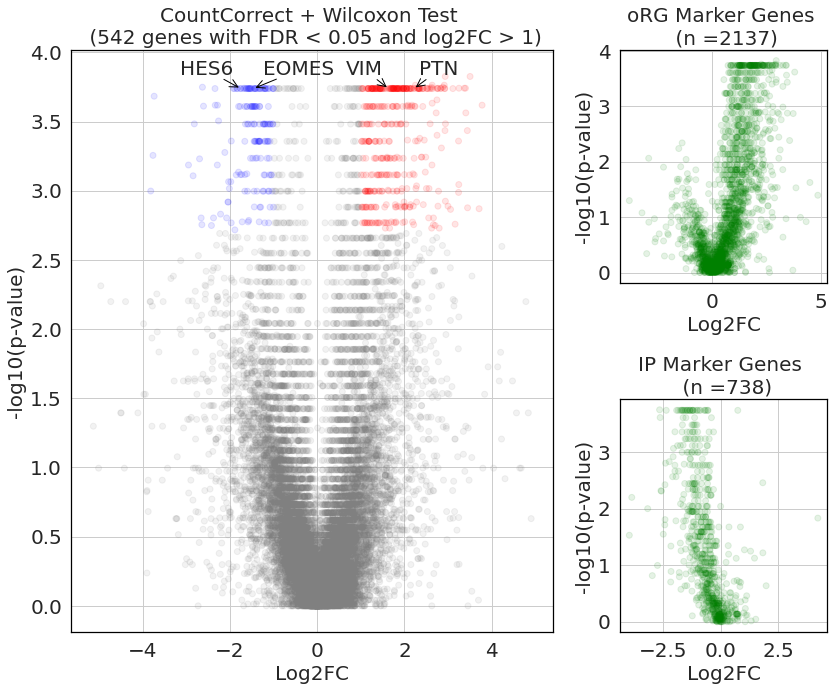

In [44]:
plot_volcano_with_reference(np.array(test_rank_isc_cpm['log2fc']),
                            np.array(test_rank_isc_cpm['qval']),
                            np.array(test_rank_isc_cpm['pval']),
                            np.array(test_rank_isc_cpm['gene']),
                            542,
                            group1_reference, group2_reference,
                            width = 12, height = 10,
                            n_max_genes = 0,
                            alpha = 0.05,
                            genesOfInterest = np.array(('EOMES', 'HES6', 'PTN', 'VIM')),
                            saveFig = '/nfs/team283/aa16/KR_NAS/0_publication_figures/Figure4C_DE-Analysis.pdf')

In [ ]:
from adjustText import adjust_text

def plot_volcano_comparison(log2fc, fdr, pval, genes, total, group1_reference, group2_reference, self,
                                genesOfInterest = None, n_max_genes = 1, alpha = 0.25, FDR_cutoff = 0.05,
                                height = 10, width = 10, posterios_samples = 1000, saveFig = None):
    r""" Make a volcano plot of the differential expression analysis.
    :genesOfInterest: numpy array of genes to annotate in the plot
    :n_max_genes: number of genes to automatically annotate at the extreme ends of the plot,
    i.e. the most differentially expressed genes
    :alpha: transparency of dots 
    :FDR_cutoff: what false discovery rate to use
    :height: height of figure
    :width: width of figure
    """
    
    fdr[0] = fdr[0][np.abs(log2fc[0]) < 1000]
    pval[0] = pval[0][np.abs(log2fc[0]) < 1000]
    genes[0] = genes[0][np.abs(log2fc[0]) < 1000]
    log2fc[0] = log2fc[0][np.abs(log2fc[0]) < 1000]
    
    fdr[1] = fdr[1][np.abs(log2fc[1]) < 1000]
    pval[1] = pval[1][np.abs(log2fc[1]) < 1000]
    genes[1] = genes[1][np.abs(log2fc[1]) < 1000]
    log2fc[1] = log2fc[1][np.abs(log2fc[1]) < 1000]
    
    subset2 = [g in group1_reference for g in genes[0]]
    subset3 = [g in group2_reference for g in genes[0]]
    
    # Set figure parameters:
    SMALL_SIZE = 20
    MEDIUM_SIZE = 20
    BIGGER_SIZE = 20
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title    
    
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 1
    plt.rcParams['grid.color'] = "#cccccc"
    
    fig, ax = plt.subplots(3,3, figsize=(width, height))
    
    colours = np.repeat('grey', len(log2fc[0]))
    colours[[log2fc[0][i] > 1 and fdr[0][i] < FDR_cutoff for i in range(len(log2fc[0]))]] = 'red'
    colours[[log2fc[0][i] < -1 and fdr[0][i] < FDR_cutoff for i in range(len(log2fc[0]))]] = 'blue'
    ax[0,0].scatter(log2fc[0], -np.log10(pval[0]), c=colours, alpha = 0.1)
    #plt.hlines(np.amin(self.logFC['probability'][self.logFC['FDR'] < FDR_cutoff]), np.amin(self.logFC['mean']),
    #           np.amax(self.logFC['mean']), linestyles = 'dashed')
    #plt.text(np.amin(self.logFC['mean']),np.amin(self.logFC['probability'][self.logFC['FDR'] < FDR_cutoff]) + 0.01,
    #         'FDR < ' + str(FDR_cutoff))
    ax[0,0].set_xlabel('Log2FC')
    ax[0,0].set_ylim(0,4)
    ax[0,0].set_xlim(-4.25,4.25)
    ax[0,0].set_ylabel('-log10(p-value)')
    ax[0,0].set_title('Wilcoxon Test \n (' + 
                  str(total[0]) +
                 ' genes with FDR < 0.05 \n and log2FC > 1)')
    plt.grid(True)
    
    if n_max_genes > 0:

        maxGenes = np.array((genes[0][np.argmax(log2fc[0])],
                             genes[0][np.argmin(log2fc[0])]))
        if genesOfInterest is None:
            genesOfInterest = maxGenes
        else:
            genesOfInterest = np.concatenate((genesOfInterest, maxGenes)) 

    if genesOfInterest is not None:

        geneIndex_to_annotate = np.squeeze([np.where(genes[0] == genesOfInterest[i])
                                            for i in range(len(genesOfInterest))])
        
        ts = []    
        for i,j in enumerate(geneIndex_to_annotate):
            ts.append(ax[0,0].text(log2fc[0][j], -np.log10(pval[0])[j], genesOfInterest[i]))
        adjust_text(ts, arrowprops=dict(arrowstyle='->', color='black'), ax = ax[0,0], force_points = (5,5))
    
    colours = np.repeat('green', len(log2fc[0]))
    ax[1,0].scatter(log2fc[0][subset2], -np.log10(pval[0][subset2]),
                c=colours[subset2], alpha = 0.1)
    #plt.hlines(np.amin(self.logFC['probability'][self.logFC['FDR'] < FDR_cutoff]), np.amin(self.logFC['mean']),
    #           np.amax(self.logFC['mean']), linestyles = 'dashed')
    #plt.text(np.amin(self.logFC['mean']),np.amin(self.logFC['probability'][self.logFC['FDR'] < FDR_cutoff]) + 0.01,
    #         'FDR < ' + str(FDR_cutoff))
    ax[1,0].set_xlabel('Log2FC')
    ax[1,0].set_ylim(0,4)
    ax[1,0].set_xlim(-4.25,4.25)
    ax[1,0].set_ylabel('-log10(p-value)')
    ax[1,0].set_title('oRG Marker Genes \n (n =' + str(sum(subset2)) + ')')
    plt.grid(True)
    
    colours = np.repeat('green', len(log2fc[0]))
    ax[2,0].scatter(log2fc[0][subset3], -np.log10(pval[0][subset3]),
                c=colours[subset3], alpha = 0.1)
    #plt.hlines(np.amin(self.logFC['probability'][self.logFC['FDR'] < FDR_cutoff]), np.amin(self.logFC['mean']),
    #           np.amax(self.logFC['mean']), linestyles = 'dashed')
    #plt.text(np.amin(self.logFC['mean']),np.amin(self.logFC['probability'][self.logFC['FDR'] < FDR_cutoff]) + 0.01,
    #         'FDR < ' + str(FDR_cutoff))
    ax[2,0].set_xlabel('Log2FC')
    ax[2,0].set_ylim(0,4)
    ax[2,0].set_xlim(-4.25,4.25)
    ax[2,0].set_ylabel('-log10(p-value)')
    ax[2,0].set_title('IP Marker Genes \n (n =' + str(sum(subset3)) + ')' )
    plt.grid(True)
    
    subset2 = [g in group1_reference for g in genes[1]]
    subset3 = [g in group2_reference for g in genes[1]]
    
    colours = np.repeat('grey', len(log2fc[1]))
    colours[[log2fc[1][i] > 1 and fdr[1][i] < FDR_cutoff for i in range(len(log2fc[1]))]] = 'red'
    colours[[log2fc[1][i] < -1 and fdr[1][i] < FDR_cutoff for i in range(len(log2fc[1]))]] = 'blue'
    ax[0,1].scatter(log2fc[1], -np.log10(pval[1]), c=colours, alpha = 0.1)
    #plt.hlines(np.amin(self.logFC['probability'][self.logFC['FDR'] < FDR_cutoff]), np.amin(self.logFC['mean']),
    #           np.amax(self.logFC['mean']), linestyles = 'dashed')
    #plt.text(np.amin(self.logFC['mean']),np.amin(self.logFC['probability'][self.logFC['FDR'] < FDR_cutoff]) + 0.01,
    #         'FDR < ' + str(FDR_cutoff))
    ax[0,1].set_xlabel('Log2FC')
    ax[0,1].set_ylim(0,4)
    ax[0,1].set_xlim(-4.25,4.25)
    ax[0,1].set_ylabel('-log10(p-value)')
    ax[0,1].set_title('CountCorrect + Wilcoxon Test \n (' + 
                  str(total[1]) +
                 ' genes with FDR < 0.05 \n and log2FC > 1)')
    plt.grid(True)

    if genesOfInterest is not None:

        geneIndex_to_annotate = np.squeeze([np.where(genes[1] == genesOfInterest[i])
                                            for i in range(len(genesOfInterest))])
        
        ts = []    
        for i,j in enumerate(geneIndex_to_annotate):
            ts.append(ax[0,1].text(log2fc[1][j], -np.log10(pval[1])[j], genesOfInterest[i]))
        adjust_text(ts, arrowprops=dict(arrowstyle='->', color='black'), ax = ax[0,1], force_points = (5,5))
    
    colours = np.repeat('green', len(log2fc[1]))
    ax[1,1].scatter(log2fc[1][subset2], -np.log10(pval[1][subset2]),
                c=colours[subset2], alpha = 0.1)
    #plt.hlines(np.amin(self.logFC['probability'][self.logFC['FDR'] < FDR_cutoff]), np.amin(self.logFC['mean']),
    #           np.amax(self.logFC['mean']), linestyles = 'dashed')
    #plt.text(np.amin(self.logFC['mean']),np.amin(self.logFC['probability'][self.logFC['FDR'] < FDR_cutoff]) + 0.01,
    #         'FDR < ' + str(FDR_cutoff))
    ax[1,1].set_xlabel('Log2FC')
    ax[1,1].set_ylim(0,4)
    ax[1,1].set_xlim(-4.25,4.25)
    ax[1,1].set_ylabel('-log10(p-value)')
    ax[1,1].set_title('oRG Marker Genes \n (n =' + str(sum(subset2)) + ')')
    plt.grid(True)
    
    colours = np.repeat('green', len(log2fc[1]))
    ax[2,1].scatter(log2fc[1][subset3], -np.log10(pval[1][subset3]),
                c=colours[subset3], alpha = 0.1)
    #plt.hlines(np.amin(self.logFC['probability'][self.logFC['FDR'] < FDR_cutoff]), np.amin(self.logFC['mean']),
    #           np.amax(self.logFC['mean']), linestyles = 'dashed')
    #plt.text(np.amin(self.logFC['mean']),np.amin(self.logFC['probability'][self.logFC['FDR'] < FDR_cutoff]) + 0.01,
    #         'FDR < ' + str(FDR_cutoff))
    ax[2,1].set_xlabel('Log2FC')
    ax[2,1].set_ylim(0,4)
    ax[2,1].set_xlim(-4.25,4.25)
    ax[2,1].set_ylabel('-log10(p-value)')
    ax[2,1].set_title('IP Marker Genes \n (n =' + str(sum(subset3)) + ')' )
    plt.grid(True)
    
    subset2 = [self.logFC.index[i] in group1_reference for i in range(len(self.logFC.index))]
    subset3 = [self.logFC.index[i] in group2_reference for i in range(len(self.logFC.index))]
    
    colours = np.repeat('grey', len(self.logFC['mean']))
    colours[[self.logFC['mean'][i] > 0 and self.logFC['FDR'][i] < FDR_cutoff for i in range(len(self.logFC['mean']))]] = 'red'
    colours[[self.logFC['mean'][i] < 0 and self.logFC['FDR'][i] < FDR_cutoff for i in range(len(self.logFC['mean']))]] = 'blue'
    ax[0,2].scatter(self.logFC['mean'], -np.log10(1-self.logFC['probability']+ 1/posterios_samples), c=colours, alpha = 0.1)
    #plt.hlines(np.amin(self.logFC['probability'][self.logFC['FDR'] < FDR_cutoff]), np.amin(self.logFC['mean']),
    #           np.amax(self.logFC['mean']), linestyles = 'dashed')
    #plt.text(np.amin(self.logFC['mean']),np.amin(self.logFC['probability'][self.logFC['FDR'] < FDR_cutoff]) + 0.01,
    #         'FDR < ' + str(FDR_cutoff))
    ax[0,2].set_xlabel('Log2FC')
    ax[0,2].set_ylim(0,3.5)
    ax[0,2].set_xlim(-4.25,4.25)
    ax[0,2].set_ylabel('-log10(P(Log2FC > ' + str(self.logFC['threshold'][0]) + '))')
    ax[0,2].set_title('Probabilistic Generative Model \n (' + 
                  str(sum([self.logFC['FDR'][i] < 0.05 for i in range(len(mod1.logFC['FDR']))])) +
                 ' genes with FDR < 0.05 \n and log2FC > 1)')
    plt.grid(True)

    if genesOfInterest is not None:

        geneIndex_to_annotate = np.squeeze([np.where(self.logFC.index == genesOfInterest[i])
                                            for i in range(len(genesOfInterest))])
        
        ts = []    
        for i,j in enumerate(geneIndex_to_annotate):
            ts.append(ax[0,2].text(self.logFC['mean'][j], -np.log10(1-(self.logFC['probability'][j] - 1/posterios_samples)), genesOfInterest[i]))
        
        adjust_text(ts, arrowprops=dict(arrowstyle='->', color='black'), ax = ax[0,2], force_points = (5,5))
    
    colours = np.repeat('green', len(self.logFC['mean']))
    ax[1,2].scatter(self.logFC['mean'].iloc[subset2], -np.log10(1-self.logFC['probability'].iloc[subset2]+ 1/posterios_samples),
                c=colours[subset2], alpha = 0.1)
    #plt.hlines(np.amin(self.logFC['probability'][self.logFC['FDR'] < FDR_cutoff]), np.amin(self.logFC['mean']),
    #           np.amax(self.logFC['mean']), linestyles = 'dashed')
    #plt.text(np.amin(self.logFC['mean']),np.amin(self.logFC['probability'][self.logFC['FDR'] < FDR_cutoff]) + 0.01,
    #         'FDR < ' + str(FDR_cutoff))
    ax[1,2].set_xlabel('Log2FC')
    ax[1,2].set_ylim(0,3.5)
    ax[1,2].set_xlim(-4.25,4.25)
    ax[1,2].set_ylabel('-log10(P(Log2FC > ' + str(self.logFC['threshold'][0]) + '))')
    ax[1,2].set_title('oRG Marker Genes \n (n =' + str(sum(subset2)) + ')')
    plt.grid(True)
    
    colours = np.repeat('green', len(self.logFC['mean']))
    ax[2,2].scatter(self.logFC['mean'].iloc[subset3], -np.log10(1-self.logFC['probability'].iloc[subset3]+ 1/posterios_samples),
                c=colours[subset3], alpha = 0.1)
    #plt.hlines(np.amin(self.logFC['probability'][self.logFC['FDR'] < FDR_cutoff]), np.amin(self.logFC['mean']),
    #           np.amax(self.logFC['mean']), linestyles = 'dashed')
    #plt.text(np.amin(self.logFC['mean']),np.amin(self.logFC['probability'][self.logFC['FDR'] < FDR_cutoff]) + 0.01,
    #         'FDR < ' + str(FDR_cutoff))
    ax[2,2].set_xlabel('Log2FC')
    ax[2,2].set_ylim(0,3.5)
    ax[2,2].set_xlim(-4.25,4.25)
    ax[2,2].set_ylabel('-log10(P(Log2FC > ' + str(self.logFC['threshold'][0]) + '))')
    ax[2,2].set_title('IP Marker Genes \n (n =' + str(sum(subset3)) + ')' )
    plt.grid(True)
    
    plt.tight_layout()
    
    if saveFig:
        plt.savefig(saveFig)
    plt.show()

In [ ]:
np.sum(mod1.logFC['FDR'] < 0.05)

In [ ]:
mod2 = pickle.load(open("/nfs/team283/aa16/InSituCellTools/benchmarking/fitted_models/model_datasize74nfactors15backgroundUncertainty1.0NEWoverdispersionUncertainty0.001expressionLevelUncertainty0.25.p", "rb" ))

In [ ]:
ProbeCounts_GeneralModel_V2.compute_logFC(mod2, groupA = order_HOPX, groupB = order_EOMES, correction=2)
mod2.compute_FDR(logFC_threshold = threshold)

In [ ]:
plot_volcano_comparison([np.array(test_rank_cpm['log2fc']), np.array(test_rank_isc_cpm['log2fc'])],
                        [np.array(test_rank_cpm['qval']), np.array(test_rank_isc_cpm['qval'])],
                        [np.array(test_rank_cpm['pval']), np.array(test_rank_isc_cpm['pval'])],
                        [np.array(test_rank_cpm['gene']), np.array(test_rank_isc_cpm['gene'])],
                        [175,542],
                        group1_reference, group2_reference,
                        mod1,
                        width = 15, height = 15,
                        n_max_genes = 0,
                        alpha = 0.05,
                        genesOfInterest = None,
                        saveFig = '/nfs/team283/aa16/KR_NAS/0_publication_figures/SuppFig_DE_volcanoPlots_3Comparison-CC-V2-Default.pdf')

0.9479126185080289
0.22236360600844027


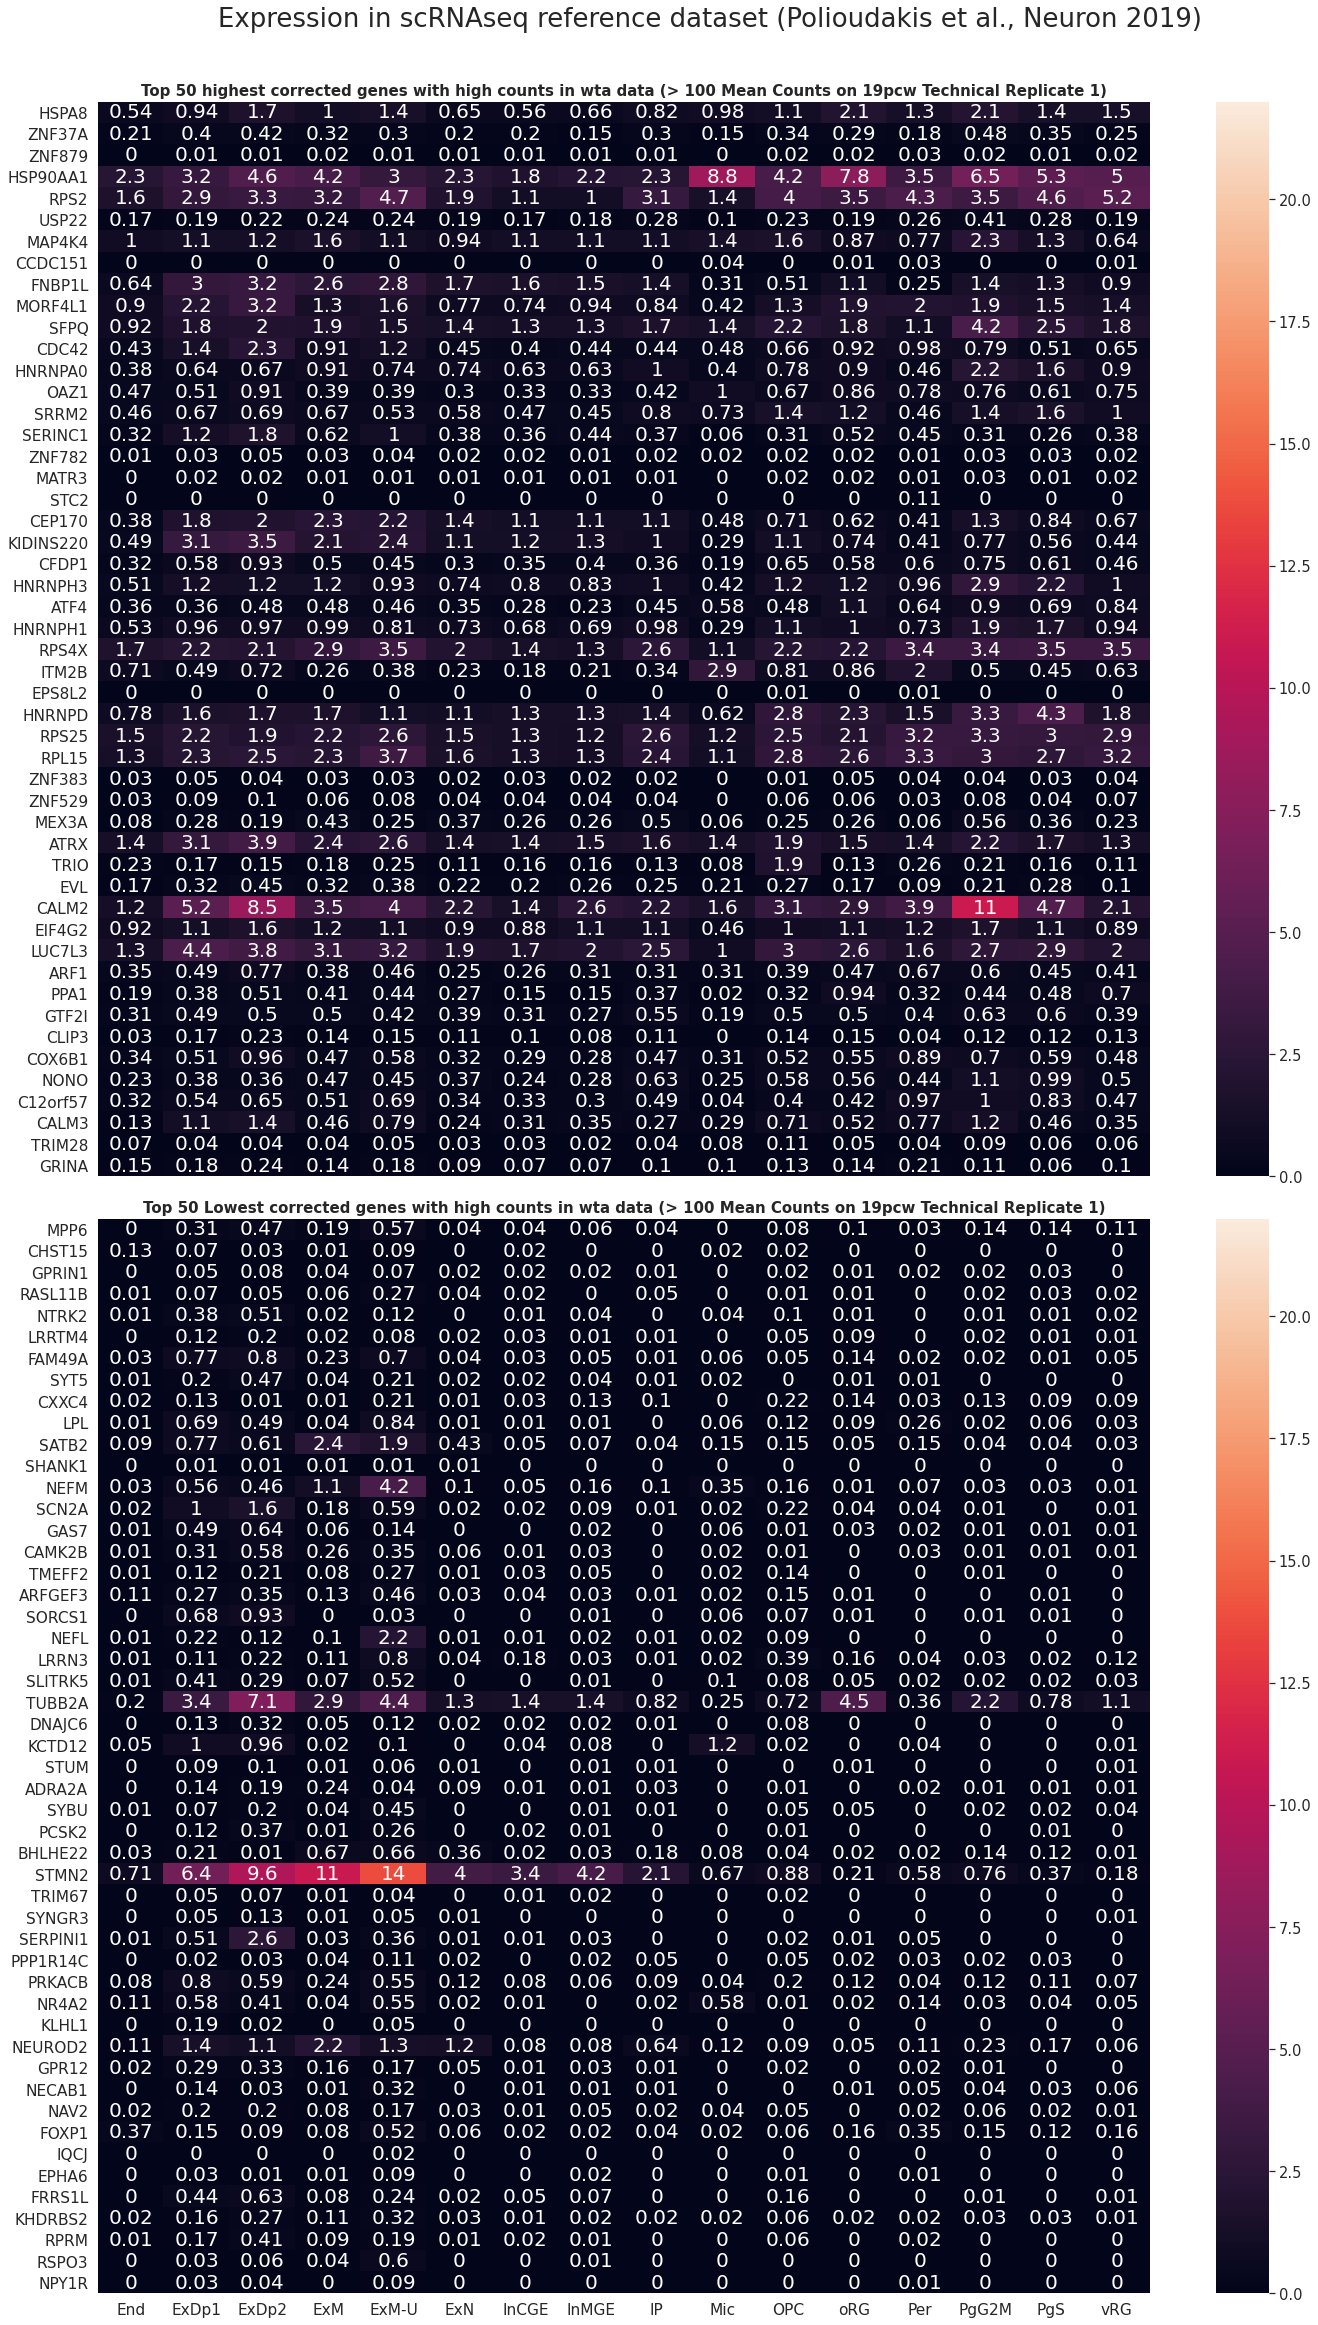

In [33]:
rankedGenes = ProbeCounts_GeneralModel_V2.rank_X_corrected_genes(mod1)
rankedGenes = rankedGenes.loc[rankedGenes['Mean Counts'] > 100,:]
rankedGenes = rankedGenes.sort_values('Removed Counts', ascending = False)

# Get reference scRNAseq data:
meanExpression_sc = pd.read_csv(path + "data/polioudakis2019_meanExpressionProfiles.csv", index_col=0)

# Make our gene list:
commonGenes = [rankedGenes['Gene'].iloc[i] for i in range(len(rankedGenes)) if rankedGenes['Gene'].iloc[i] in meanExpression_sc.index]
topGenes = commonGenes[0:50]
bottomGenes = commonGenes[-50:]
# celltypeMarkers = np.array(('HES1', 'STMN2', 'VIM', 'SATB2', 'MEF2C', 'DLX1'))
# lookup_genes = np.concatenate([topGenes, celltypeMarkers])

fig, ax = plt.subplots(2,1, sharex = True, figsize = (20,33))
sns.set(font_scale=1.33)
ax[0].set_title('Top 50 highest corrected genes with high counts in wta data (> 100 Mean Counts on 19pcw Technical Replicate 1)',
               fontweight="bold", size=15)
ax[0] = sns.heatmap(np.round(meanExpression_sc.loc[topGenes,:],2), annot = True,  annot_kws={"size": 20},
           vmin = 0, vmax = 22, ax = ax[0])
ax[1].set_title('Top 50 Lowest corrected genes with high counts in wta data (> 100 Mean Counts on 19pcw Technical Replicate 1)',
               fontweight="bold", size=15)
ax[1] = sns.heatmap(np.round(meanExpression_sc.loc[bottomGenes,:],2), annot = True,  annot_kws={"size": 20},
           vmin = 0, vmax = 22, ax = ax[1])
plt.suptitle('Expression in scRNAseq reference dataset (Polioudakis et al., Neuron 2019)')
plt.tight_layout()
fig.subplots_adjust(top=0.94)
plt.savefig('/nfs/team283/aa16/KR_NAS/0_publication_figures/SuppFig_Most+LeastCorrectedGenes_AbsoluteCountsRemoved_Heatmap.pdf')
rankedGenes.loc[np.concatenate([topGenes, bottomGenes]),:].to_csv('/nfs/team283/aa16/KR_NAS/0_publication_tables/Most+LeastCorrectedGenes_AbsoluteCountsRemoved.csv')
print(np.mean(np.mean(meanExpression_sc.loc[topGenes,:], axis = 1)))
print(np.mean(np.mean(meanExpression_sc.loc[bottomGenes,:], axis = 1)))

0.09523377067564978
0.7728320139955284


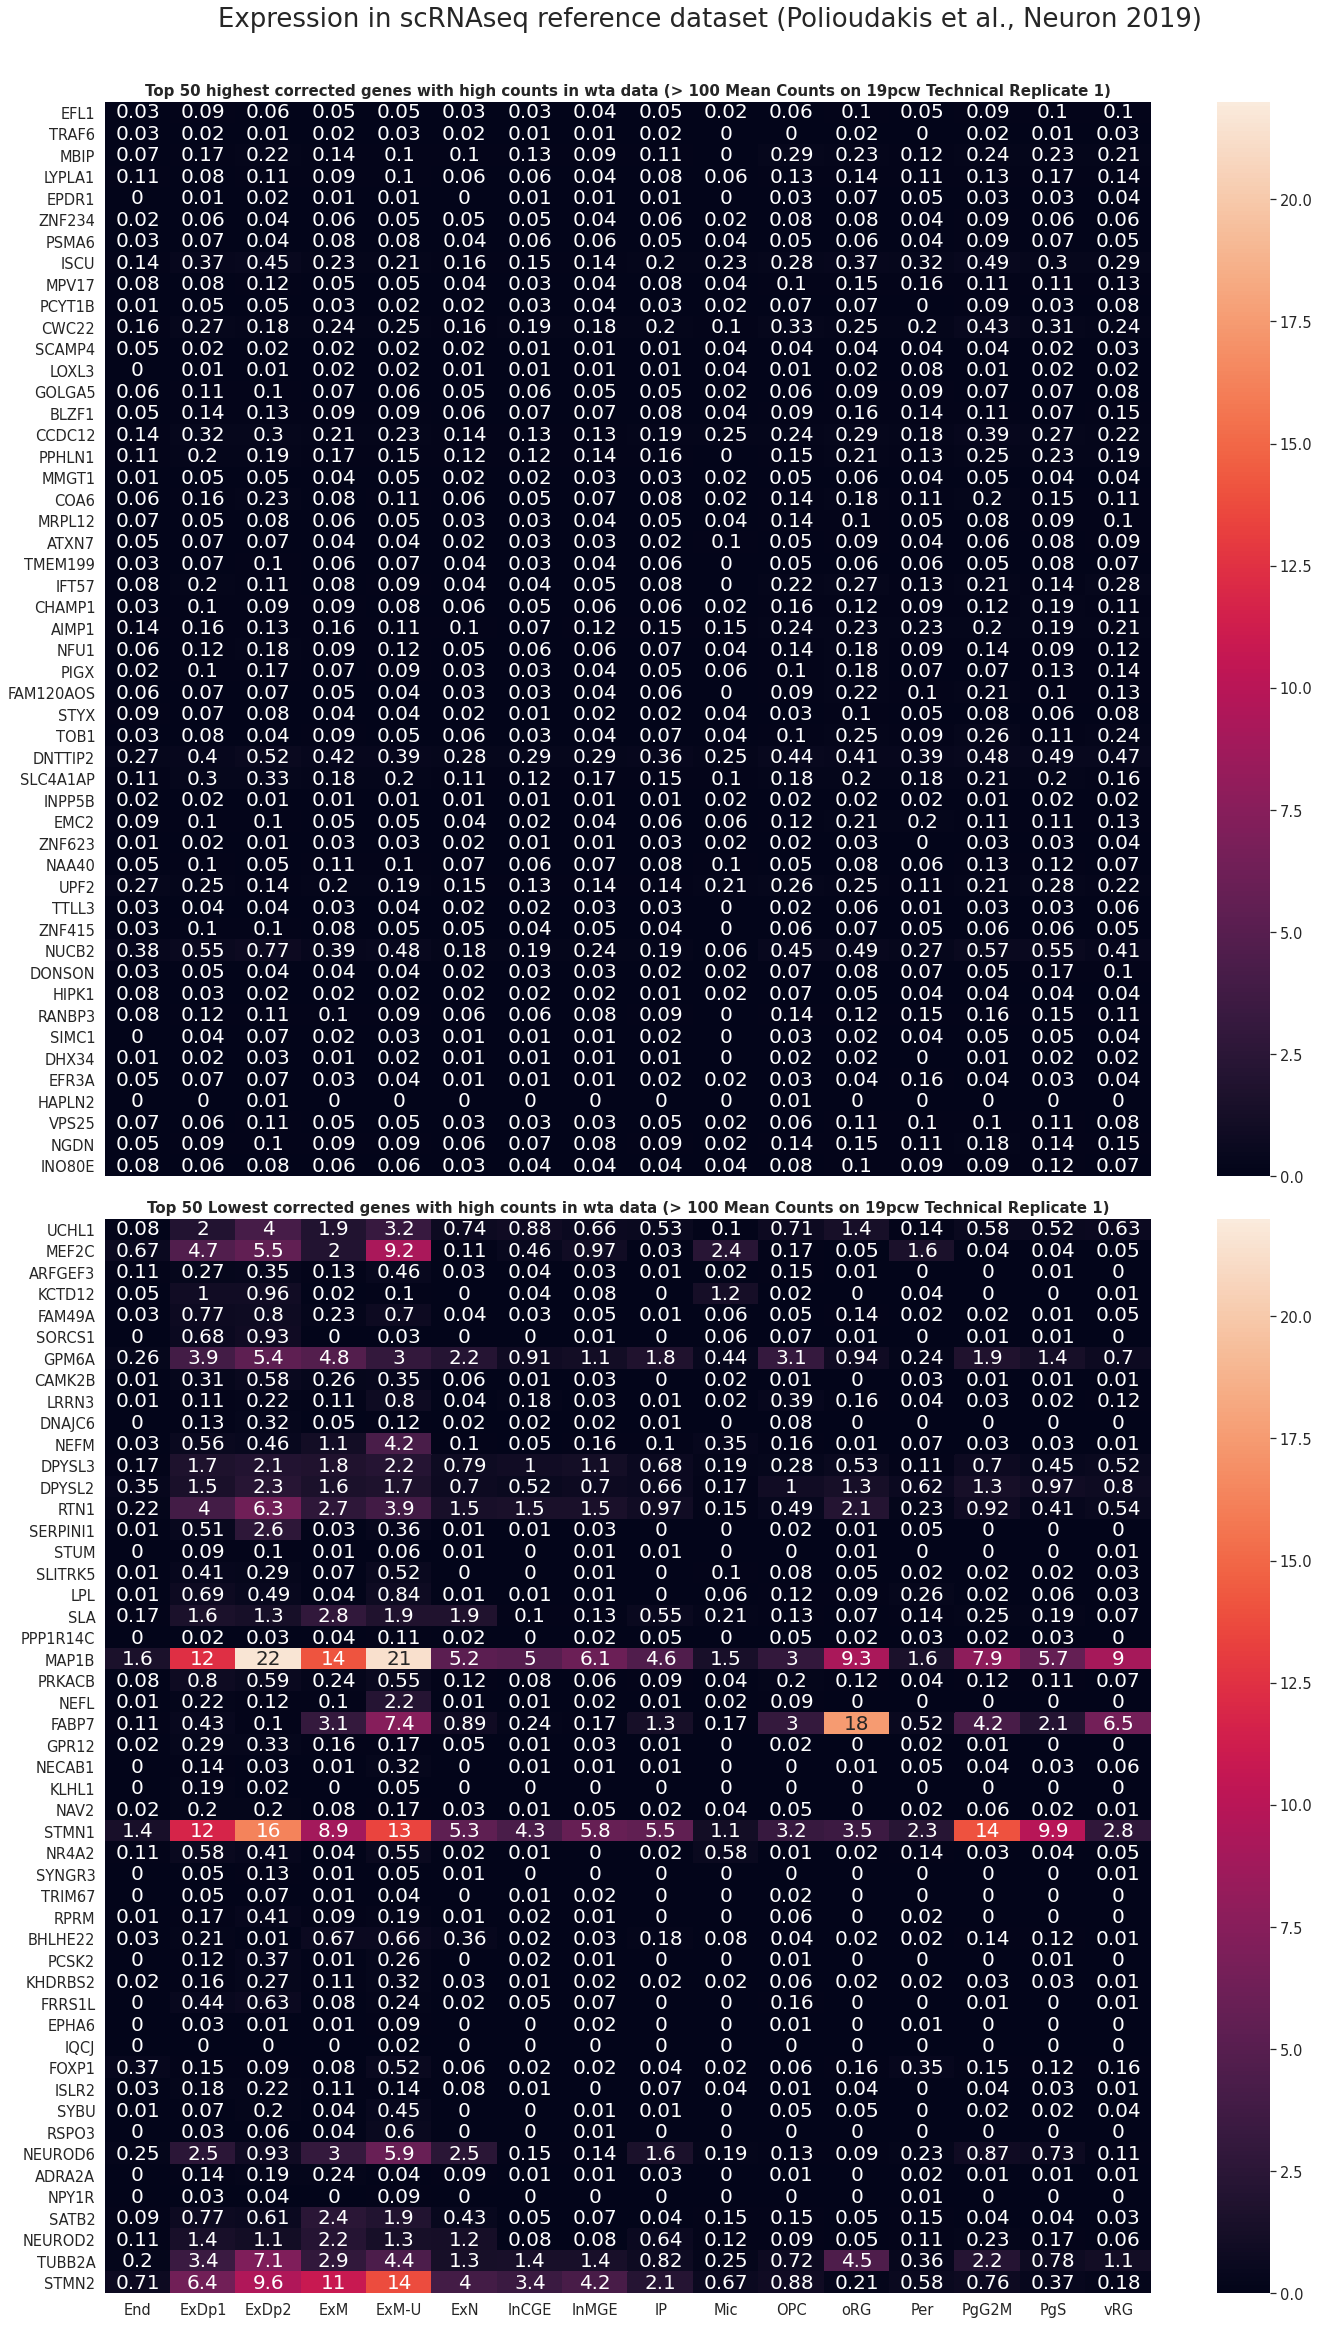

In [34]:
rankedGenes = ProbeCounts_GeneralModel_V2.rank_X_corrected_genes(mod1)
rankedGenes = rankedGenes.loc[rankedGenes['Mean Counts'] > 100,:]
rankedGenes = rankedGenes.sort_values('Fraction Removed Counts (Mean)', ascending = False)

# Get reference scRNAseq data:
meanExpression_sc = pd.read_csv(path + "data/polioudakis2019_meanExpressionProfiles.csv", index_col=0)

# Make our gene list:
commonGenes = [rankedGenes['Gene'].iloc[i] for i in range(len(rankedGenes)) if rankedGenes['Gene'].iloc[i] in meanExpression_sc.index]
topGenes = commonGenes[0:50]
bottomGenes = commonGenes[-50:]
# celltypeMarkers = np.array(('HES1', 'STMN2', 'VIM', 'SATB2', 'MEF2C', 'DLX1'))
# lookup_genes = np.concatenate([topGenes, celltypeMarkers])

fig, ax = plt.subplots(2,1, sharex = True, figsize = (20,33))
sns.set(font_scale=1.33)
ax[0].set_title('Top 50 highest corrected genes with high counts in wta data (> 100 Mean Counts on 19pcw Technical Replicate 1)',
               fontweight="bold", size=15)
ax[0] = sns.heatmap(np.round(meanExpression_sc.loc[topGenes,:],2), annot = True,  annot_kws={"size": 20},
           vmin = 0, vmax = 22, ax = ax[0])
ax[1].set_title('Top 50 Lowest corrected genes with high counts in wta data (> 100 Mean Counts on 19pcw Technical Replicate 1)',
               fontweight="bold", size=15)
ax[1] = sns.heatmap(np.round(meanExpression_sc.loc[bottomGenes,:],2), annot = True,  annot_kws={"size": 20},
           vmin = 0, vmax = 22, ax = ax[1])
plt.suptitle('Expression in scRNAseq reference dataset (Polioudakis et al., Neuron 2019)')
plt.tight_layout()
fig.subplots_adjust(top=0.94)
plt.savefig('/nfs/team283/aa16/KR_NAS/0_publication_figures/SuppFig_Most+LeastCorrectedGenes_FractionRemoved_Heatmap.pdf')
rankedGenes.loc[np.concatenate([topGenes, bottomGenes]),:].to_csv('/nfs/team283/aa16/KR_NAS/0_publication_tables/Most+LeastCorrectedGenes_FractionRemoved.csv')
print(np.mean(np.mean(meanExpression_sc.loc[topGenes,:], axis = 1)))
print(np.mean(np.mean(meanExpression_sc.loc[bottomGenes,:], axis = 1)))

Show the same data in scatter plot:

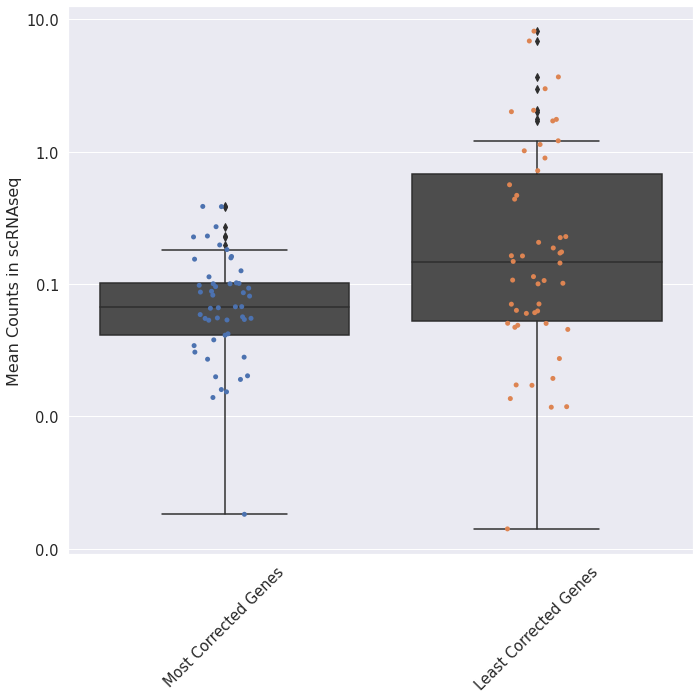

In [35]:
rankedGenes = ProbeCounts_GeneralModel_V2.rank_X_corrected_genes(mod1)
rankedGenes = rankedGenes.loc[rankedGenes['Mean Counts'] > 100,:]
rankedGenes = rankedGenes.sort_values('Fraction Removed Counts (Mean)', ascending = False)

# Get reference scRNAseq data:
meanExpression_sc = pd.read_csv(path + "data/polioudakis2019_meanExpressionProfiles.csv", index_col=0)

# Make our gene list:
commonGenes = [rankedGenes['Gene'].iloc[i] for i in range(len(rankedGenes)) if rankedGenes['Gene'].iloc[i] in meanExpression_sc.index]
topGenes = commonGenes[0:50]
bottomGenes = commonGenes[-50:]

np.mean(meanExpression_sc.loc[topGenes,:], axis = 1)
np.mean(meanExpression_sc.loc[bottomGenes,:], axis = 1)

df = pd.DataFrame(columns = ['Category', "ExpressionInScRNAseq"])
df['Category'] = np.concatenate([np.repeat('Most Corrected Genes', 50), np.repeat('Least Corrected Genes', 50)])
df['ExpressionInScRNAseq'] = np.concatenate([np.mean(meanExpression_sc.loc[topGenes,:], axis = 1),
                                             np.mean(meanExpression_sc.loc[bottomGenes,:], axis = 1)])

fig, ax = plt.subplots(1,1,figsize = (10,10))
ax = sns.stripplot(x="Category", y="ExpressionInScRNAseq", data=df,  ax = ax)
ax = sns.boxplot(x="Category", y="ExpressionInScRNAseq", data=df, color=".3")
ax.set_ylabel('Mean Counts in scRNAseq')
ax.set_xlabel(None)
ax.set_yscale('log', basey = 10)
ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/nfs/team283/aa16/KR_NAS/0_publication_figures/SuppFig_50Most+LeastCorrectedGenesByFractionRemoved_JitterPlotBoxPlot.pdf')

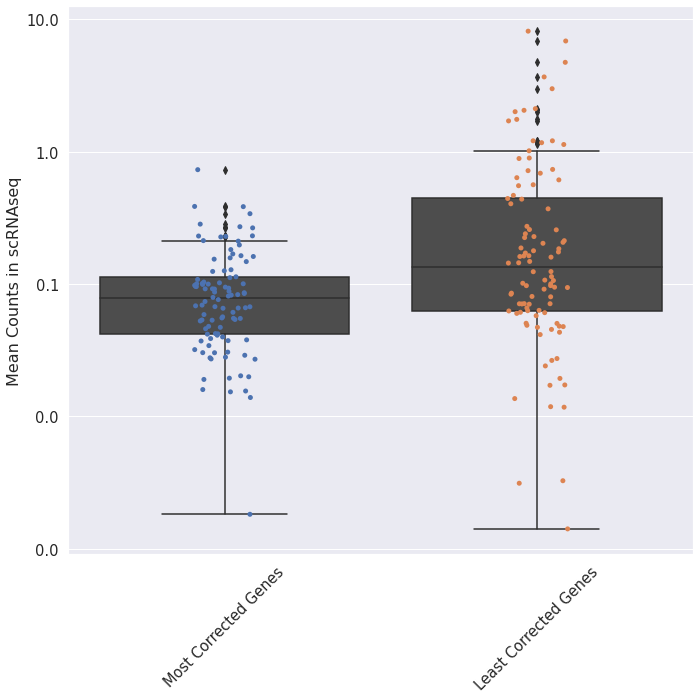

In [36]:
rankedGenes = ProbeCounts_GeneralModel_V2.rank_X_corrected_genes(mod1)
rankedGenes = rankedGenes.loc[rankedGenes['Mean Counts'] > 100,:]
rankedGenes = rankedGenes.sort_values('Fraction Removed Counts (Mean)', ascending = False)

# Get reference scRNAseq data:
meanExpression_sc = pd.read_csv(path + "data/polioudakis2019_meanExpressionProfiles.csv", index_col=0)

# Make our gene list:
commonGenes = [rankedGenes['Gene'].iloc[i] for i in range(len(rankedGenes)) if rankedGenes['Gene'].iloc[i] in meanExpression_sc.index]
topGenes = commonGenes[0:100]
bottomGenes = commonGenes[-100:]

np.mean(meanExpression_sc.loc[topGenes,:], axis = 1)
np.mean(meanExpression_sc.loc[bottomGenes,:], axis = 1)

df = pd.DataFrame(columns = ['Category', "ExpressionInScRNAseq"])
df['Category'] = np.concatenate([np.repeat('Most Corrected Genes', 100), np.repeat('Least Corrected Genes', 100)])
df['ExpressionInScRNAseq'] = np.concatenate([np.mean(meanExpression_sc.loc[topGenes,:], axis = 1),
                                             np.mean(meanExpression_sc.loc[bottomGenes,:], axis = 1)])

fig, ax = plt.subplots(1,1,figsize = (10,10))
ax = sns.stripplot(x="Category", y="ExpressionInScRNAseq", data=df,  ax = ax)
ax = sns.boxplot(x="Category", y="ExpressionInScRNAseq", data=df, color=".3")
ax.set_ylabel('Mean Counts in scRNAseq')
ax.set_xlabel(None)
ax.set_yscale('log', basey = 10)
ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/nfs/team283/aa16/KR_NAS/0_publication_figures/SuppFig_100Most+LeastCorrectedGenesByFractionRemoved_JitterPlotBoxPlot.pdf')

Show ratio of scRNAseq expression in most and least corrected genes:

In [37]:
ratio = []
intervals = []
for i in range(10):
    start = i*25
    end = (i+1)*25
    rankedGenes = ProbeCounts_GeneralModel_V2.rank_X_corrected_genes(mod1)
    rankedGenes = rankedGenes.loc[rankedGenes['Mean Counts'] > start,:]
    rankedGenes = rankedGenes.loc[rankedGenes['Mean Counts'] < end,:]
    rankedGenes = rankedGenes.sort_values('Removed Counts', ascending = False)

    commonGenes = [rankedGenes['Gene'].iloc[i] for i in range(len(rankedGenes)) if rankedGenes['Gene'].iloc[i] in meanExpression_sc.index]
    topGenes = commonGenes[0:25]
    bottomGenes = commonGenes[-25:]
    ratio += [np.mean(np.mean(meanExpression_sc.loc[topGenes,:], axis = 1))/np.mean(np.mean(meanExpression_sc.loc[bottomGenes,:], axis = 1))]
    intervals += [(start+end)/2]
print(np.mean(ratio))

1.4679390323455264


Text(0.5, 0, 'Mean Counts Interval')

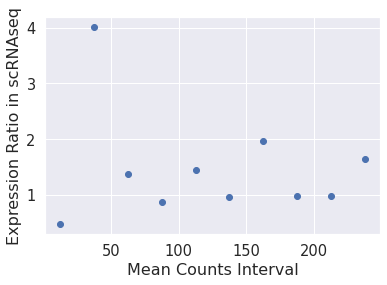

In [38]:
plt.scatter(intervals, ratio)
plt.ylabel('Expression Ratio in scRNAseq')
plt.xlabel('Mean Counts Interval')

Find genes that we think have a lot of background or little background based on scRNAseq data, by looking at the difference of their z-scored mean expression in the scRNAseq and wta data set:

In [39]:
import scipy as scipy
wta_meanExpression = np.mean(adata_slide[1].X[:,np.array([np.where(adata_slide[1].var_names == g)[0][0] for g in commonGenes])], axis = 0)
sc_meanExpression = np.mean(meanExpression_sc.loc[commonGenes,:], axis = 1)
wta_zscore = scipy.stats.zscore(np.log2(0.01+wta_meanExpression))
sc_zscore = scipy.stats.zscore(np.log2(0.01+sc_meanExpression))

(-2.0, 2.4975468886029564)

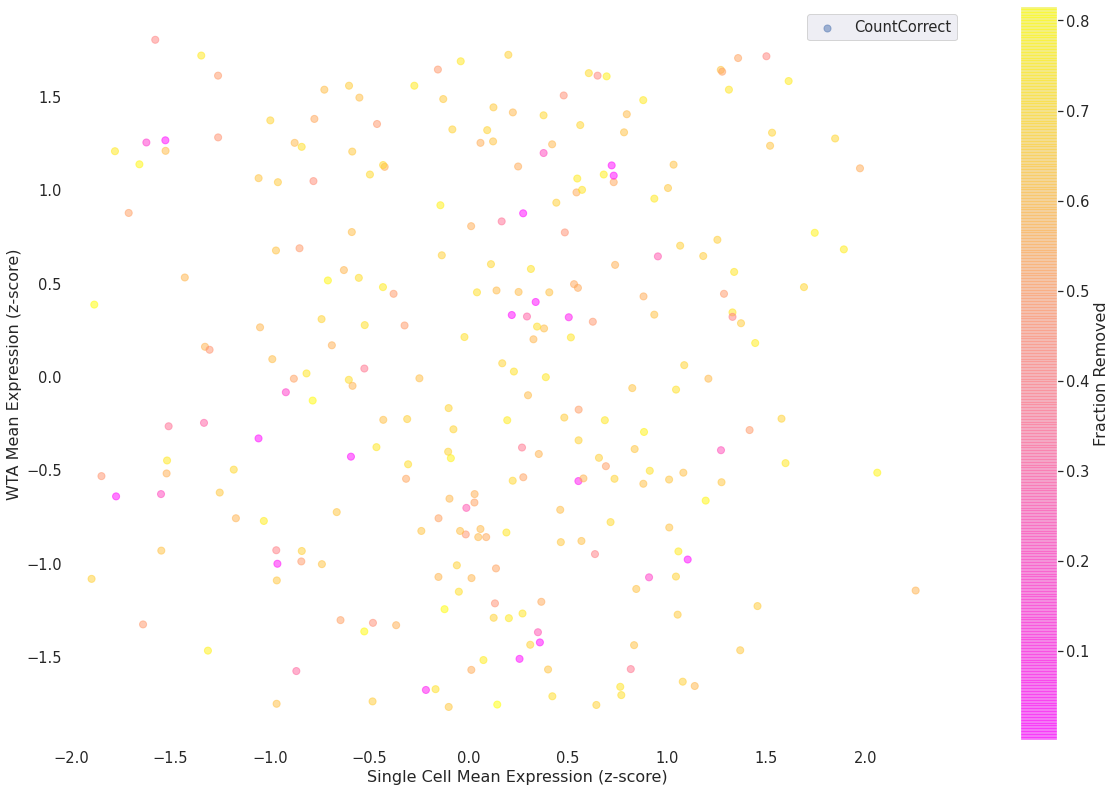

In [40]:
randomize = np.random.choice(range(len(commonGenes)), len(commonGenes), replace = False)

fig, ax = plt.subplots(1,1, figsize=(20,13.5))
mesh = ax.scatter(sc_zscore[randomize],  wta_zscore[randomize], c = np.array(rankedGenes['Fraction Removed Counts (Mean)'][commonGenes])[randomize], alpha = 0.5, label = 'CountCorrect',
   s=50, cmap = 'spring')
# plt.plot(np.arange(-6,4,0.1), np.arange(-6,4,0.1))
ax.plot()
ax.legend()
ax.set_xlabel('Single Cell Mean Expression (z-score)')
ax.set_ylabel('WTA Mean Expression (z-score)')
ax.set_facecolor('white')
ax=plt.gca()
cbar = fig.colorbar(mesh)
cbar.set_label('Fraction Removed')
ax.set_xlim(xmin = -2)


(-2.0, 1.9812250316143036)

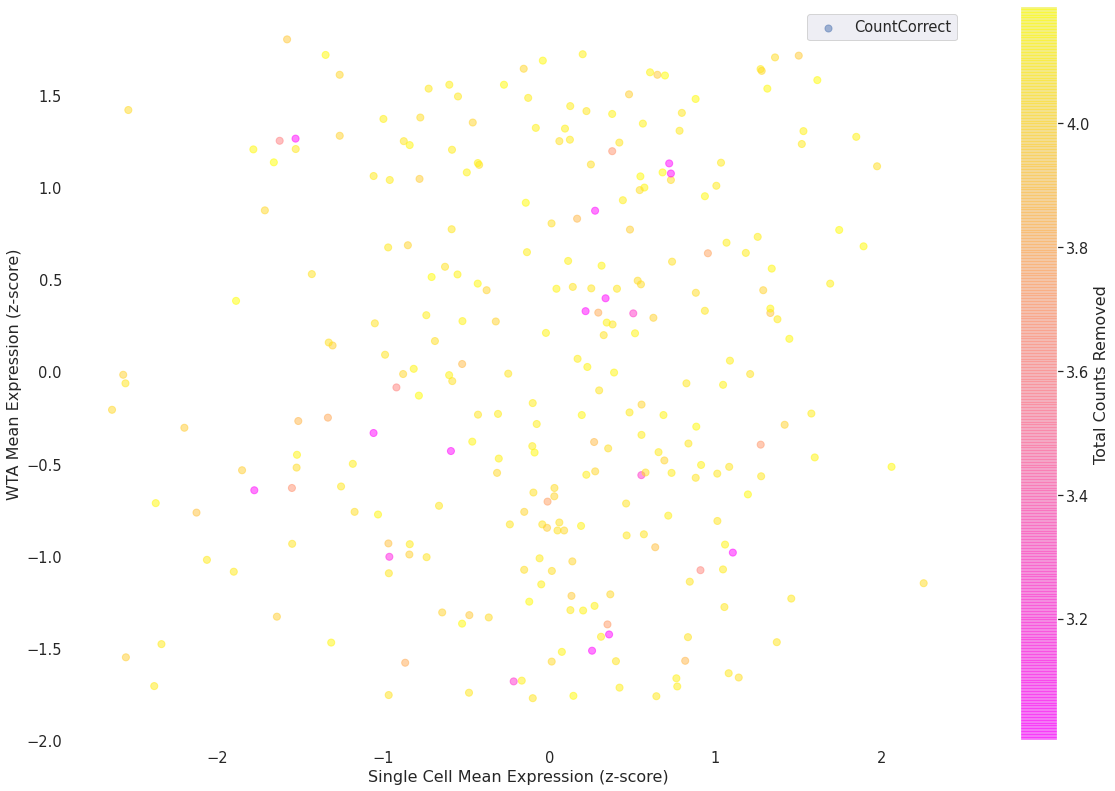

In [41]:
randomize = np.random.choice(range(len(commonGenes)), len(commonGenes), replace = False)

fig, ax = plt.subplots(1,1, figsize=(20,13.5))
mesh = ax.scatter(sc_zscore[randomize],  wta_zscore[randomize], c = np.array(np.log10(1000+rankedGenes['Removed Counts'][commonGenes]))[randomize], alpha = 0.5, label = 'CountCorrect',
   s=50, cmap = 'spring')
# plt.plot(np.arange(-6,4,0.1), np.arange(-6,4,0.1))
ax.plot()
ax.legend()
ax.set_xlabel('Single Cell Mean Expression (z-score)')
ax.set_ylabel('WTA Mean Expression (z-score)')
ax.set_facecolor('white')
ax=plt.gca()
cbar = fig.colorbar(mesh)
cbar.set_label('Total Counts Removed')
ax.set_ylim(ymin = -2)

Show scRNAseq expression vs fraction of corrected counts:

In [42]:
rankedGenes = ProbeCounts_GeneralModel_V2.rank_X_corrected_genes(mod1)
# Get reference scRNAseq data:
meanExpression_sc = pd.read_csv(path + "data/polioudakis2019_meanExpressionProfiles.csv", index_col=0)
# Make our gene list:
commonGenes = [rankedGenes['Gene'].iloc[i] for i in range(len(rankedGenes)) if rankedGenes['Gene'].iloc[i] in meanExpression_sc.index]

AttributeError: 'AxesSubplot' object has no attribute 'xlim'

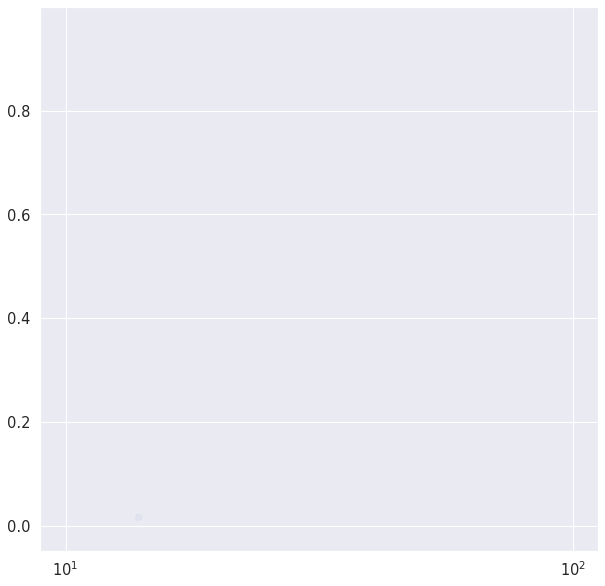

In [43]:
fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(np.mean(meanExpression_sc.loc[commonGenes,:], axis = 1),
            rankedGenes.loc[commonGenes,:].loc[:,'Fraction Removed Counts (Mean)'], alpha = 0.05)
ax.set_xscale('log')
ax.xlim(xmin = 0.000001)
ax.xlabel('scRNAseq counts')
ax.ylabel('Fraction Background')

Compare naive and CountCorrect model in terms of how highly most corrected genes are expressed in scRNAseq and how many counts are removed in total.

In [50]:
rankedGenes = ProbeCounts_GeneralModel_V2.rank_X_corrected_genes(mod1)
meanExpression_sc = pd.read_csv(path + "data/polioudakis2019_meanExpressionProfiles.csv", index_col=0)
commonGenes = [rankedGenes['Gene'].iloc[i] for i in range(len(rankedGenes)) if rankedGenes['Gene'].iloc[i] in meanExpression_sc.index]
topGenes1 = commonGenes[0:50]
topGenes3 = commonGenes[0:100]
print(np.sum(np.mean(meanExpression_sc.loc[topGenes3,:], axis = 1) < 0.1))
topGenes5 = commonGenes[0:200]
lowGenes = np.array(topGenes5)[np.mean(meanExpression_sc.loc[topGenes5,:], axis = 1) < 0.1]
print(np.sum(np.mean(meanExpression_sc.loc[topGenes5,:], axis = 1) < 0.1))
print(np.mean(rankedGenes['Removed Counts'])/74)
print(np.sum(rankedGenes['Removed Counts'])/np.sum(rankedGenes['Total Counts']))

85
180
78.92363929660829
0.5685486291152917


In [54]:
saveTab = rankedGenes.loc[topGenes5,:].iloc[0:200,:]
saveTab['Mean expression across scRNAseq main cell types'] = np.mean(meanExpression_sc, axis = 1)[saveTab.index]

In [55]:
saveTab

Gene  Total Counts  Removed Counts  \
HEATR3      HEATR3          2902            2763   
C12orf42  C12orf42          3202            3035   
ERRFI1      ERRFI1          3713            3515   
COPS7B      COPS7B          3030            2865   
BTBD8        BTBD8          4134            3903   
...            ...           ...             ...   
MCF2          MCF2          4635            4218   
KRTAP6-2  KRTAP6-2          2600            2366   
SYCE3        SYCE3          3555            3235   
TMEM54      TMEM54          4632            4215   
ZMAT5        ZMAT5          4795            4361   

          Fraction Removed Counts (Mean)  Fraction Removed Counts (q05)  \
HEATR3                          0.952102                       0.935906   
C12orf42                        0.947845                       0.933167   
ERRFI1                          0.946674                       0.931053   
COPS7B                          0.945545                       0.930693   
BTBD8                           0.944122                       0.927915   
...                                  ...                            ...   
MCF2                            0.910032                       0.891046   
KRTAP6-2                        0.910000                       0.894231   
SYCE3                           0.909986                       0.895077   
TMEM54                          0.909974                       0.890112   
ZMAT5                           0.909489                       0.891345   

          Fraction Removed Counts (q95)  Mean Counts  \
HEATR3                         0.964852           39   
C12orf42                       0.962523           43   
ERRFI1                         0.957447           50   
COPS7B                         0.957756           40   
BTBD8                          0.961055           55   
...                                 ...          ...   
MCF2                           0.927077           62   
KRTAP6-2                       0.924615           35   
SYCE3                          0.923488           48   
TMEM54                         0.926166           62   
ZMAT5                          0.926590           64   

          Mean expression across scRNAseq main cell types  
HEATR3                                           0.041987  
C12orf42                                         0.001247  
ERRFI1                                           0.031255  
COPS7B                                           0.041399  
BTBD8                                            0.040647  
...                                                   ...  
MCF2                                             0.013383  
KRTAP6-2                                         0.000127  
SYCE3                                            0.000156  
TMEM54                                           0.004268  
ZMAT5                                            0.065941  

[200 rows x 8 columns]

In [56]:
saveTab.to_csv('/nfs/team283/aa16/KR_NAS/0_publication_tables/Top200-MostCorrected-Genes-CC.csv')

In [47]:
import imp
import isctools
from isctools import pymc3_model
imp.reload(isctools.pymc3_model)
imp.reload(isctools.ProbeCounts__GeneralModel_V2_SmoothedOverdispersion)
from isctools.ProbeCounts__GeneralModel_V2_SmoothedOverdispersion import ProbeCounts_GeneralModel_V2

In [57]:
rankedGenes = ProbeCounts_GeneralModel_V2.rank_X_corrected_genes_naive(mod1)
meanExpression_sc = pd.read_csv(path + "data/polioudakis2019_meanExpressionProfiles.csv", index_col=0)
commonGenes = [rankedGenes['Gene'].iloc[i] for i in range(len(rankedGenes)) if rankedGenes['Gene'].iloc[i] in meanExpression_sc.index]
topGenes2 = commonGenes[0:50]
topGenes4 = commonGenes[0:100]
print(np.sum(np.mean(meanExpression_sc.loc[topGenes4,:], axis = 1) < 0.1))
topGenes6 = commonGenes[0:200]
print(np.sum(np.mean(meanExpression_sc.loc[topGenes6,:], axis = 1) < 0.1))
print(np.mean(rankedGenes['Removed Counts'])/74)
print(np.sum(rankedGenes['Removed Counts'])/np.sum(rankedGenes['Total Counts']))

70
146
58.60413071860635
0.42217133519828554


In [61]:
saveTab = rankedGenes.loc[topGenes6,:].iloc[0:200,:]
saveTab['Mean expression across scRNAseq main cell types'] = np.mean(meanExpression_sc, axis = 1)[saveTab.index]

In [62]:
np.sum(saveTab['Mean expression across scRNAseq main cell types'] > 0.1)

54

In [64]:
saveTab

Gene  Total Counts  Removed Counts  \
COMMD4      COMMD4            74              74   
HTR7          HTR7          2960            2960   
GALNT3      GALNT3            75              75   
EIF4EBP1  EIF4EBP1            74              74   
XRCC6        XRCC6           909             909   
...            ...           ...             ...   
LCN12        LCN12          2201            2201   
LCN15        LCN15          2406            2406   
CASC3        CASC3           250             250   
TRIM63      TRIM63          2679            2679   
ABHD15      ABHD15          2874            2874   

          Fraction Removed Counts (Mean)  Mean Counts  \
COMMD4                               1.0            1   
HTR7                                 1.0           40   
GALNT3                               1.0            1   
EIF4EBP1                             1.0            1   
XRCC6                                1.0           12   
...                                  ...          ...   
LCN12                                1.0           29   
LCN15                                1.0           32   
CASC3                                1.0            3   
TRIM63                               1.0           36   
ABHD15                               1.0           38   

          Mean expression across scRNAseq main cell types  
COMMD4                                           0.112440  
HTR7                                             0.000813  
GALNT3                                           0.005084  
EIF4EBP1                                         0.120517  
XRCC6                                            0.427724  
...                                                   ...  
LCN12                                            0.000629  
LCN15                                            0.000196  
CASC3                                            0.212487  
TRIM63                                           0.002741  
ABHD15                                           0.003007  

[200 rows x 6 columns]

In [65]:
saveTab.to_csv('/nfs/team283/aa16/KR_NAS/0_publication_tables/Top200-MostCorrected-Genes-Naive.csv')

In [ ]:
fig, ax = plt.subplots(2,1, sharex = True, figsize = (20,33))
sns.set(font_scale=1.33)
ax[0].set_title('Most corrected genes (CountCorrect)',
               fontweight="bold", size=15)
ax[0] = sns.heatmap(np.round(meanExpression_sc.loc[topGenes1,:],2), annot = True,  annot_kws={"size": 20},
           vmin = 0, vmax = 4, ax = ax[0])
ax[1].set_title('Most corrected genes (Naive Strategy)',
               fontweight="bold", size=15)
ax[1] = sns.heatmap(np.round(meanExpression_sc.loc[topGenes2,:],2), annot = True,  annot_kws={"size": 20},
           vmin = 0, vmax = 4, ax = ax[1])
plt.suptitle('Expression in scRNAseq reference dataset (Polioudakis et al., Neuron 2019)')
plt.tight_layout()
fig.subplots_adjust(top=0.94)
plt.savefig('/nfs/team283/aa16/KR_NAS/0_publication_figures/SuppFig_MostCorrectedGenes_CountCorrect_vs_Naive_top50.pdf')

Check how highly the non-expressed scRNAseq genes are corrected in naive vs. CountCorrect:

In [ ]:
zeroGenes = meanExpression_sc.index[np.mean(meanExpression_sc, axis = 1) == 0]

In [ ]:
commonZeroGenes = [rankedGenes['Gene'].iloc[i] for i in range(len(rankedGenes)) if rankedGenes['Gene'].iloc[i] in zeroGenes]

In [ ]:
meanExpression_sc.loc[zeroGenes,:]

In [ ]:
rankedGenes = ProbeCounts_GeneralModel_V2.rank_X_corrected_genes_naive(mod1)
np.mean(rankedGenes.loc[commonZeroGenes,'Fraction Removed Counts (Mean)'])
np.mean(rankedGenes.loc[lowGenes,'Fraction Removed Counts (Mean)'])

In [ ]:
rankedGenes = ProbeCounts_GeneralModel_V2.rank_X_corrected_genes(mod1)
np.mean(rankedGenes.loc[commonZeroGenes,'Fraction Removed Counts (Mean)'])
np.mean(rankedGenes.loc[lowGenes,'Fraction Removed Counts (Mean)'])

In [ ]:
fig, ax = plt.subplots(2,1, sharex = True, figsize = (20,66))
sns.set(font_scale=1.33)
ax[0].set_title('Most corrected genes (CountCorrect)',
               fontweight="bold", size=15)
ax[0] = sns.heatmap(np.round(meanExpression_sc.loc[topGenes3,:],2), annot = True,  annot_kws={"size": 20},
           vmin = 0, vmax = 4, ax = ax[0])
ax[1].set_title('Most corrected genes (Naive Strategy)',
               fontweight="bold", size=15)
ax[1] = sns.heatmap(np.round(meanExpression_sc.loc[topGenes4,:],2), annot = True,  annot_kws={"size": 20},
           vmin = 0, vmax = 4, ax = ax[1])
plt.suptitle('Expression in scRNAseq reference dataset (Polioudakis et al., Neuron 2019)')
plt.tight_layout()
fig.subplots_adjust(top=0.94)
plt.savefig('/nfs/team283/aa16/KR_NAS/0_publication_figures/SuppFig_MostCorrectedGenes_CountCorrect_vs_Naive_top100.pdf')

In [ ]:
fig, ax = plt.subplots(2,1, sharex = True, figsize = (20,99))
sns.set(font_scale=1.33)
ax[0].set_title('Most corrected genes (CountCorrect)',
               fontweight="bold", size=15)
ax[0] = sns.heatmap(np.round(meanExpression_sc.loc[topGenes5,:],2), annot = True,  annot_kws={"size": 20},
           vmin = 0, vmax = 4, ax = ax[0])
ax[1].set_title('Most corrected genes (Naive Strategy)',
               fontweight="bold", size=15)
ax[1] = sns.heatmap(np.round(meanExpression_sc.loc[topGenes6,:],2), annot = True,  annot_kws={"size": 20},
           vmin = 0, vmax = 4, ax = ax[1])
plt.suptitle('Expression in scRNAseq reference dataset (Polioudakis et al., Neuron 2019)')
plt.tight_layout()
fig.subplots_adjust(top=0.94)
plt.savefig('/nfs/team283/aa16/KR_NAS/0_publication_figures/SuppFig_MostCorrectedGenes_CountCorrect_vs_Naive_top200.pdf')

Also plot this as a scatter plot:

In [ ]:
df = pd.DataFrame(columns = ['Category', "ExpressionInScRNAseq"])
df['Category'] = np.concatenate([np.repeat('CountCorrect', 200), np.repeat('Naive Strategy', 200)])
df['ExpressionInScRNAseq'] = np.concatenate([np.mean(meanExpression_sc.loc[topGenes,:], axis = 1),
                                             np.mean(meanExpression_sc.loc[bottomGenes,:], axis = 1)])

fig, ax = plt.subplots(1,1,figsize = (10,10))
ax = sns.stripplot(x="Category", y="ExpressionInScRNAseq", data=df,  ax = ax)
ax = sns.boxplot(x="Category", y="ExpressionInScRNAseq", data=df, color=".3")
ax.set_ylabel('Mean Counts in scRNAseq')
ax.set_xlabel(None)
ax.set_yscale('log', basey = 10)
ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/nfs/team283/aa16/KR_NAS/0_publication_figures/SuppFig_100Most+LeastCorrectedGenesByFractionRemoved_JitterPlotBoxPlot.pdf')